# Mount to my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
root_dir = "/content/drive/My Drive/Colab Notebooks/Colab Data"

#See what hardware we are using

In [ ]:
!pip install gpustat

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

!gpustat

     |████████████████████████████████| 81kB 2.3MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp36-none-any.whl size=12622 sha256=d2f7620b1bb99be9dd8960de0714b11ef45947c244afea2067a80cc53ea0cd73
  Stored in directory: /root/.cache/pip/wheels/48/b4/d5/fb5b7f1d040f2ff20687e3bad6867d63155dbde5a7c10f4293
Successfully built gpustat
Wed Jun 24 08:41:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |           

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 27kB/s 
     |████████████████████████████████| 6.6MB 52kB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101
     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=7fdfc9dd147a7db531e5636eb04abe28a08953c646df5ebc964d850e29a01302
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-r

# install detectron2:

In [ ]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 1.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200623-cp36-none-any.whl size=41183 sha256=c5d03d85d5ecaefca58d460c721cfbc29df4bcaf6c166ff29574c61f7c64b5d5
  Stored in directory: /root/.cache/pip/wheels/31/b5/a9/df0fd43b263cc96c1d5076ade63fdcdd30fab8699e3366a60c
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import os
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Train on a custom dataset 
## Install and import muscima and mung for some juicy features

In [ ]:
!pip install mung
!pip install omrdatasettools
!pip install tqdm

     |████████████████████████████████| 122kB 2.7MB/s 
  Created wheel for mung: filename=mung-1.1-cp36-none-any.whl size=122606 sha256=434a7a7275be2d544da7f763f7dbe5a908e18696ed091730e66c36ce869b20f7
  Stored in directory: /root/.cache/pip/wheels/c0/f2/2a/7c7fba7446b2a3047023a532e5a809d5d15c68fb902c6cf7b4
Successfully built mung
     |████████████████████████████████| 51kB 2.2MB/s 
     |████████████████████████████████| 112kB 6.6MB/s 
  Created wheel for omrdatasettools: filename=omrdatasettools-1.3.0-cp36-none-any.whl size=39057 sha256=8b7d406372a3722e3bbca0cbd805c9ba22e9d7960ca55e6b9eeda8b61518e0f1
  Stored in directory: /root/.cache/pip/wheels/c8/d8/cc/480b1e75cac6842ab3d73b7b8fd64704066e0dc0629c7ae2e3
  Created wheel for muscima: filename=muscima-0.10.0-cp36-none-any.whl size=116516 sha256=8167a27f626c94d789b5845e9ef9330f861f2b7f1ef387751cc593af5b93166d
  Stored in directory: /root/.cache/pip/wheels/78/21/ce/5e0acca50a82ecb6bb884559a3ad14068eef0fcb184c43144e
Successfully built om

In [ ]:
from omrdatasettools.Downloader import Downloader
from omrdatasettools.OmrDataset import OmrDataset

if not os.path.exists("MuscimaPlusPlus_V2"):
    Downloader().download_and_extract_dataset(OmrDataset.MuscimaPlusPlus_V2, "MuscimaPlusPlus_V2")
else:
    print("MuscimaPlusPlus_V2 already exists")

if not os.path.exists("CVC_Muscima_Augmented"):
    Downloader().download_and_extract_dataset(OmrDataset.CvcMuscima_MultiConditionAligned, "CVC_Muscima_Augmented")
else:
    print("CVC_Muscima_Augmented already exists")

if not os.path.exists("MuscimaPlusPlus_Measure_Annotations"):
    Downloader().download_and_extract_dataset(OmrDataset.MuscimaPlusPlus_MeasureAnnotations, "MuscimaPlusPlus_Measure_Annotations")
else:
    print("MuscimaPlusPlus_Measure_Annotations already exists")

import requests
import zipfile

if not os.path.exists("AudioLabs"):
    url = "https://www.audiolabs-erlangen.de/resources/MIR/2019-ISMIR-LBD-Measures/MeasureBoundingBoxAnnotations.zip"
    myfile = requests.get(url)
    open("AudioLabs.zip", "wb").write(myfile.content)
    with zipfile.ZipFile("AudioLabs.zip", "r") as zip_ref:
        zip_ref.extractall("AudioLabs")
    print("downloaded and extracted AudioLabs")
else:
  print("AudioLabs already exists")

Downloading: https://github.com/OMR-Research/muscima-pp/releases/download/v2.0/MUSCIMA-pp_v2.0.zip Bytes: 11080517 into /content/MUSCIMA-pp_v2.0.zip



Extracting MuscimaPlusPlus_V2 dataset...


Downloading: https://github.com/apacha/OMR-Datasets/releases/download/datasets/CVC_MUSCIMA_PP_Annotated-Images.zip Bytes: 8038367 into /content/CVC_MUSCIMA_PP_Annotated-Images.zip



Deleting temporary directory /content/MuscimaPpImages


Downloading: https://github.com/apacha/OMR-Datasets/releases/download/datasets/CVCMUSCIMA_MCA.zip Bytes: 1768594089 into /content/CVCMUSCIMA_MCA.zip



Extracting CvcMuscima_MultiConditionAligned dataset...


Downloading: https://github.com/apacha/OMR-Datasets/releases/download/datasets/MUSCIMA-pp_v1.0-measure-annotations.zip Bytes: 270154 into /content/MUSCIMA-pp_v1.0-measure-annotations.zip



Extracting MuscimaPlusPlus_MeasureAnnotations dataset...
downloaded and extracted AudioLabs


In [ ]:
from detectron2.structures import BoxMode

# bbox_mode is from type BoxMode(IntEnum) which cant simply be converted to json
# So I had to create functions that encode and decode the enums
def convert_keys(obj, convert):
    if isinstance(obj, list):
        return [convert_keys(i, convert) for i in obj]
    if isinstance(obj, BoxMode):
        return convert(obj)
    if isinstance(obj, str) and obj.isupper(): # janky hack mate
        for x in BoxMode:
            if x.name == obj:
                return names_to_enum(obj)
    if not isinstance(obj, dict):
        return obj
    return {k: convert_keys(v, convert) for k, v in obj.items()}

def enum_to_names(obj):
    return obj.name

def names_to_enum(obj):
    return BoxMode[obj]

def save_to_json(json_path, data):
    with open(json_path, "w") as outfile:
        json.dump(convert_keys(data, enum_to_names), outfile)

def load_from_json(json_path):
    with open(json_path) as json_file:
        return convert_keys(json.load(json_file), names_to_enum)

def show_data(data, classes):
    print(data[0])
    print(classes)
    print(len(data))

# Create the desired detectron format

# RCNN - Using CVC_Muscima_Aligned

In [ ]:
import os
import json
from detectron2.structures import BoxMode
from tqdm import tqdm

def get_CVC_Muscima_dicts(data_dir, image_dir, classes):
    idx = 0
    dataset_dicts = []

    for json_file in tqdm(os.listdir(data_dir)):
        with open(os.path.join(data_dir, json_file)) as f:
            imgs_anns = json.load(f)
    
        x = json_file.split("_")
        folder_name = x[1].lower()
        image_name = x[2].lower().replace("n-", "p0") + ".png"

        for augmentation_folder in os.listdir(image_dir):
            path_to_image_file = os.path.join(image_dir, augmentation_folder, folder_name, image_name)
            
            record = {}
            record["file_name"] = path_to_image_file
            record["image_id"] = idx
            idx += 1
            record["height"] = imgs_anns["height"]
            record["width"] = imgs_anns["width"]

            objs = []
            for c in classes:
                for anno in imgs_anns[c]:
                    obj = {
                        "bbox" : [anno["left"], anno["top"], anno["right"], anno["bottom"]],
                        "bbox_mode" : BoxMode.XYXY_ABS,
                        "category_id" : classes.index(c),
                        "iscrowd" : 0
                    }
                    objs.append(obj)
            record["annotations"] = objs
            dataset_dicts.append(record)
    
    return dataset_dicts

muscima_classes = ["stave_measures"]
muscima_data = get_CVC_Muscima_dicts("./MuscimaPlusPlus_Measure_Annotations/json", "./CVC_Muscima_Augmented/CVCMUSCIMA_MultiConditionAligned", muscima_classes)

100%|██████████| 140/140 [00:00<00:00, 803.20it/s]


In [ ]:
show_data(muscima_data, muscima_classes)
json_path = os.path.join(root_dir, "AudioLabs_CVC_muscima_stave_measures.json")
save_to_json(json_path, muscima_data)

{'file_name': './CVC_Muscima_Augmented/CVCMUSCIMA_MultiConditionAligned/binary/w-05/p011.png', 'image_id': 0, 'height': 1736, 'width': 3483, 'annotations': [{'bbox': [219, 277, 561, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [575, 277, 1108, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1123, 277, 1625, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1634, 277, 2248, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [2263, 277, 2607, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [2617, 277, 3121, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [218, 511, 929, 631], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [942, 511, 1445, 631], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1453, 511, 1956, 631], 

# RCNN - Using the AudioLabs Dataset

In [ ]:
import os
import pandas as pd
from detectron2.structures import BoxMode
from tqdm import tqdm

def get_AudioLabs_dicts(data_dir):
    idx = 0
    dataset_dicts = []

    for folder in tqdm(os.listdir(data_dir)):
        if not os.path.isdir(os.path.join(data_dir, folder)) or folder == "jupyter":
            continue
        df = pd.read_csv(os.path.join(data_dir, folder, folder + ".csv"))
        img_directory = os.path.join(data_dir, folder, "img")
        for img in os.listdir(img_directory):
            path_to_image_file = os.path.join(img_directory, img)
            df_page = df[df["Image"] == os.path.basename(path_to_image_file)]
            bboxes = df_page[['X', 'Y', 'Height', 'Width']].values
            height, width = cv2.imread(path_to_image_file).shape[:2]

            record = {}
            record["file_name"] = path_to_image_file
            record["image_id"] = idx
            idx += 1
            record["height"] = height
            record["width"] = width
            
            objs = []
            for x, y, h, w in bboxes:
                right, bottom = (x+w), (y+h)
                obj = {
                    "bbox" : [int(x), int(y), int(right), int(bottom)], # weird int64 type thing parse to int
                    "bbox_mode" : BoxMode.XYXY_ABS,
                    "category_id" : 0, # only one class in the AudioLabs dataset
                    "iscrowd" : 0
                }
                objs.append(obj)

            record["annotations"] = objs
            dataset_dicts.append(record)

    return dataset_dicts

val_classes = ["system_measures"]
val_data = get_AudioLabs_dicts("./AudioLabs")

100%|██████████| 46/46 [00:09<00:00,  4.92it/s]


In [ ]:
show_data(val_data, val_classes)
json_path = os.path.join(root_dir, "AudioLabs_enhance_measures.json")
save_to_json(json_path, val_data)

{'file_name': './AudioLabs/Wagner_WWV086C-2/img/Wagner_WWV086C_155.png', 'image_id': 0, 'height': 811, 'width': 593, 'annotations': [{'bbox': [28, 74, 164, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [165, 74, 270, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [271, 74, 400, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [401, 74, 545, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [29, 195, 181, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [182, 195, 284, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [285, 195, 420, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [421, 195, 546, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [29, 314, 181, 386], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'catego

# Load CVC muscima data from json

In [ ]:
import json
import os

json_path = os.path.join(root_dir, "AudioLabs_CVC_muscima_stave_measures.json")

muscima_data = load_from_json(json_path)
muscima_classes = ['stave_measures']
show_data(muscima_data, muscima_classes)

{'file_name': './CVC_Muscima_Augmented/CVCMUSCIMA_MultiConditionAligned/binary/w-05/p011.png', 'image_id': 0, 'height': 1736, 'width': 3483, 'annotations': [{'bbox': [219, 277, 561, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [575, 277, 1108, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1123, 277, 1625, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1634, 277, 2248, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [2263, 277, 2607, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [2617, 277, 3121, 397], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [218, 511, 929, 631], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [942, 511, 1445, 631], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1453, 511, 1956, 631], 

#Load validation data from json

In [ ]:
import json
import os

json_path = os.path.join(root_dir, "AudioLabs_enhance_measures.json")

val_data = load_from_json(json_path)
val_classes = ['system_measures']
show_data(val_data, val_classes)

{'file_name': './AudioLabs/Wagner_WWV086C-2/img/Wagner_WWV086C_155.png', 'image_id': 0, 'height': 811, 'width': 593, 'annotations': [{'bbox': [28, 74, 164, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [165, 74, 270, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [271, 74, 400, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [401, 74, 545, 146], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [29, 195, 181, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [182, 195, 284, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [285, 195, 420, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [421, 195, 546, 267], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [29, 314, 181, 386], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'catego

# Load the data into MetadataCatalog for Detectron

In [ ]:
DatasetCatalog.clear() # in case the Dataset is already registerd

# Load data into MetadataCatalog function

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog

def registerDataset(data_name, d, data, classes):
    DatasetCatalog.register(data_name, lambda d=d: data)
    MetadataCatalog.get(data_name).set(thing_classes=classes)

    return MetadataCatalog.get(data_name)

# Load CVCmuscima into MetadataCatalog

In [ ]:
muscima_data_name = "CVC_muscima"
muscima_metadata = registerDataset(muscima_data_name, "muscima_data", muscima_data, muscima_classes)

# Load the validation data into MetadataCatalog

In [ ]:
val_data_name = "AudioLabs"
validation_metadata = registerDataset(val_data_name, "val_data", val_data, val_classes)

In [ ]:
from detectron2.utils.visualizer import ColorMode
def displayRandomSampleData(data, meta_data, display_count=3):
    for d in random.sample(data, display_count):
        print(d["file_name"])
        img = cv2.imread(d["file_name"])
        visualizer = Visualizer(img[:, :, ::-1], metadata=meta_data, scale=1)
        vis = visualizer.draw_dataset_dict(d)
        cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
displayRandomSampleData(muscima_data, muscima_metadata)

Output hidden; open in https://colab.research.google.com to view.

./AudioLabs/Wagner_WWV086C-2/img/Wagner_WWV086C_148.png


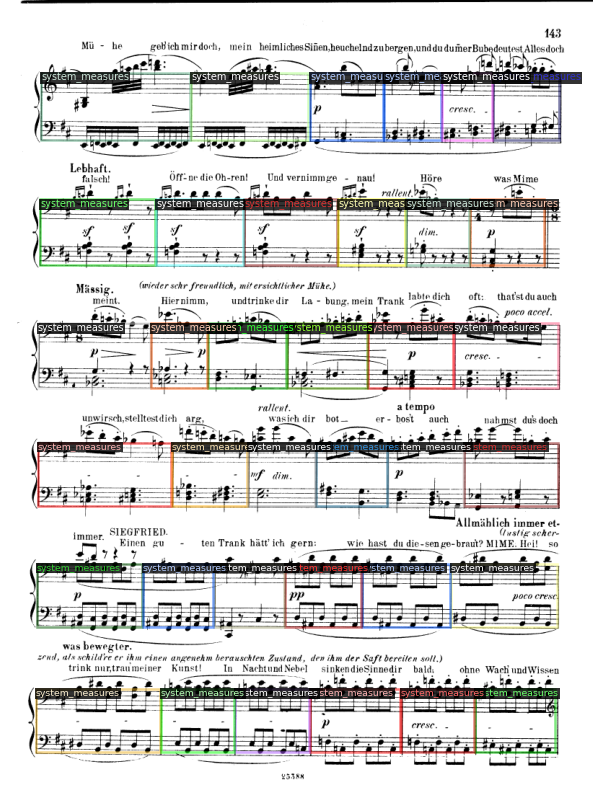

./AudioLabs/Wagner_WWV086B-3/img/Wagner_WWV086B_178.png


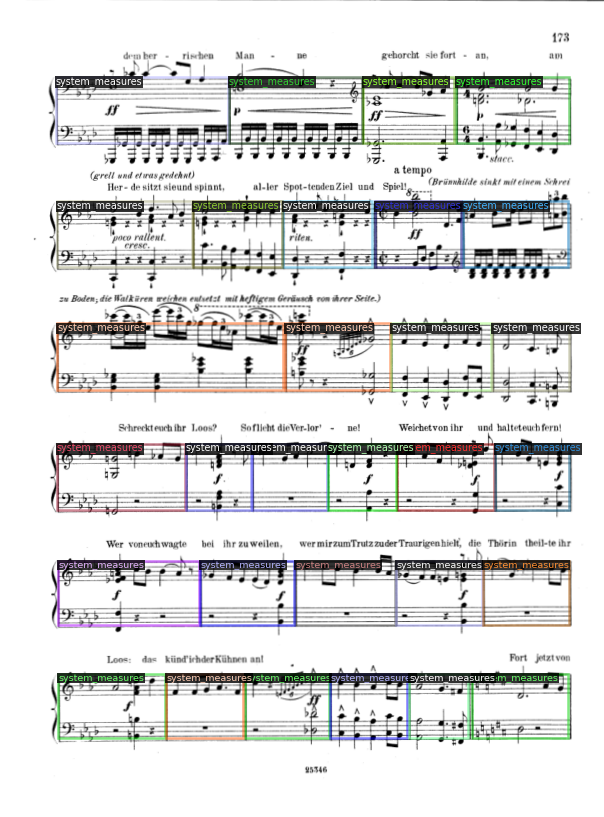

./AudioLabs/Wagner_WWV086D-1/img/Wagner_WWV086D_084.png


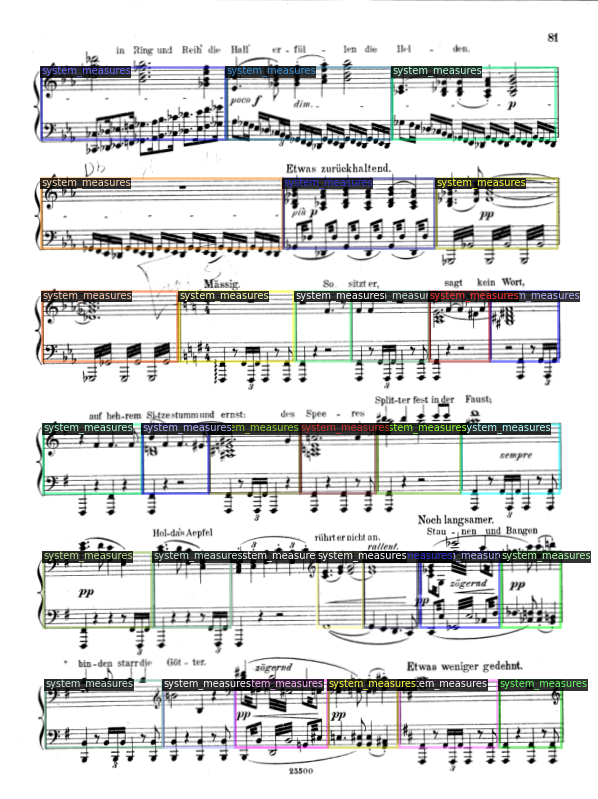

In [ ]:
displayRandomSampleData(val_data, validation_metadata)

# create test and training data

In [ ]:
from sklearn.model_selection import train_test_split

def splitDataAndRegister(data, classes):
    train_data, test_data = train_test_split(data, test_size=0.4, random_state=1)

    train_data_name = "train_data"
    d = "train"
    DatasetCatalog.register(train_data_name, lambda d=d: train_data)
    MetadataCatalog.get(train_data_name).set(thing_classes=classes)
    metadata = MetadataCatalog.get(train_data_name)

    test_data_name = "test_data"
    d = "test"
    DatasetCatalog.register(test_data_name, lambda d=d: test_data)
    MetadataCatalog.get(test_data_name).set(thing_classes=classes)

    return train_data, test_data, metadata, train_data_name, test_data_name

In [ ]:
train_data, test_data, metadata, train_data_name, test_data_name = splitDataAndRegister(muscima_data, muscima_classes)

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import time

def train_in_batches(max_iter, num_classes, model_output_dir, cfg_file, existing_model_weight_path=None):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(cfg_file))
    cfg.DATASETS.TRAIN = (train_data_name,)
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 2

    if existing_model_weight_path:
        cfg.MODEL.WEIGHTS = existing_model_weight_path
    else:
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(cfg_file)  # Let training initialize from model zoo

    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00055  # pick a good LR
    cfg.SOLVER.MAX_ITER = max_iter
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   #128 faster, and good enough for toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
    if not os.path.exists(model_output_dir):
        os.mkdir(model_output_dir)
    cfg.OUTPUT_DIR = model_output_dir

    trainer = DefaultTrainer(cfg)
    if existing_model_weight_path:
        trainer.resume_or_load(resume=True)
    else:
        trainer.resume_or_load(resume=False)

    trainer.train()

    return trainer, cfg

max_iter = 2000
model_output_dir = os.path.join(root_dir, "models/AudioLabs_enhance_CVC_measure_model")
weight_file = "model_final.pth"
path_to_weight_file = os.path.join(model_output_dir, weight_file)
cfg_file = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml" # RCNN
classes = muscima_classes

# trainer, cfg = train_in_batches(max_iter, len(classes), model_output_dir, cfg_file) # run this if first time training
trainer, cfg = train_in_batches(max_iter, len(classes), model_output_dir, cfg_file, model_output_dir) # run this if model already exists

[06/24 08:54:22 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:33, 12.4MB/s]                           
Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model!


[06/24 08:54:57 d2.engine.train_loop]: Starting training from iteration 0
[06/24 08:56:11 d2.utils.events]:  eta: 2:02:17  iter: 19  total_loss: 2.898  loss_cls: 0.688  loss_box_reg: 0.294  loss_rpn_cls: 1.532  loss_rpn_loc: 0.368  time: 3.6686  data_time: 0.0560  lr: 0.000011  max_mem: 6650M
[06/24 08:57:27 d2.utils.events]:  eta: 2:02:56  iter: 39  total_loss: 1.878  loss_cls: 0.642  loss_box_reg: 0.708  loss_rpn_cls: 0.155  loss_rpn_loc: 0.343  time: 3.7308  data_time: 0.0062  lr: 0.000022  max_mem: 6650M
[06/24 08:58:44 d2.utils.events]:  eta: 2:02:29  iter: 59  total_loss: 1.795  loss_cls: 0.583  loss_box_reg: 0.752  loss_rpn_cls: 0.142  loss_rpn_loc: 0.290  time: 3.7698  data_time: 0.0061  lr: 0.000033  max_mem: 6650M
[06/24 09:00:03 d2.utils.events]:  eta: 2:03:15  iter: 79  total_loss: 1.729  loss_cls: 0.556  loss_box_reg: 0.794  loss_rpn_cls: 0.118  loss_rpn_loc: 0.254  time: 3.8182  data_time: 0.0059  lr: 0.000044  max_mem: 6650M
[06/24 09:01:22 d2.utils.events]:  eta: 2:02:4

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:

In [ ]:
import os
from detectron2.config import get_cfg

cfg.MODEL.WEIGHTS = path_to_weight_file
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.60  # set the testing threshold for this model
cfg.DATASETS.TEST = (test_data_name)
predictor = DefaultPredictor(cfg)

Then, we randomly select several samples to visualize the prediction results.

In [ ]:
def displayRandomPredictData(data, meta_data):
    for d in random.sample(data, 3):    
        im = cv2.imread(d["file_name"])
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1], metadata=meta_data, scale=1)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        cv2_imshow(v.get_image()[:, :, ::-1])

predict the muscima dataset

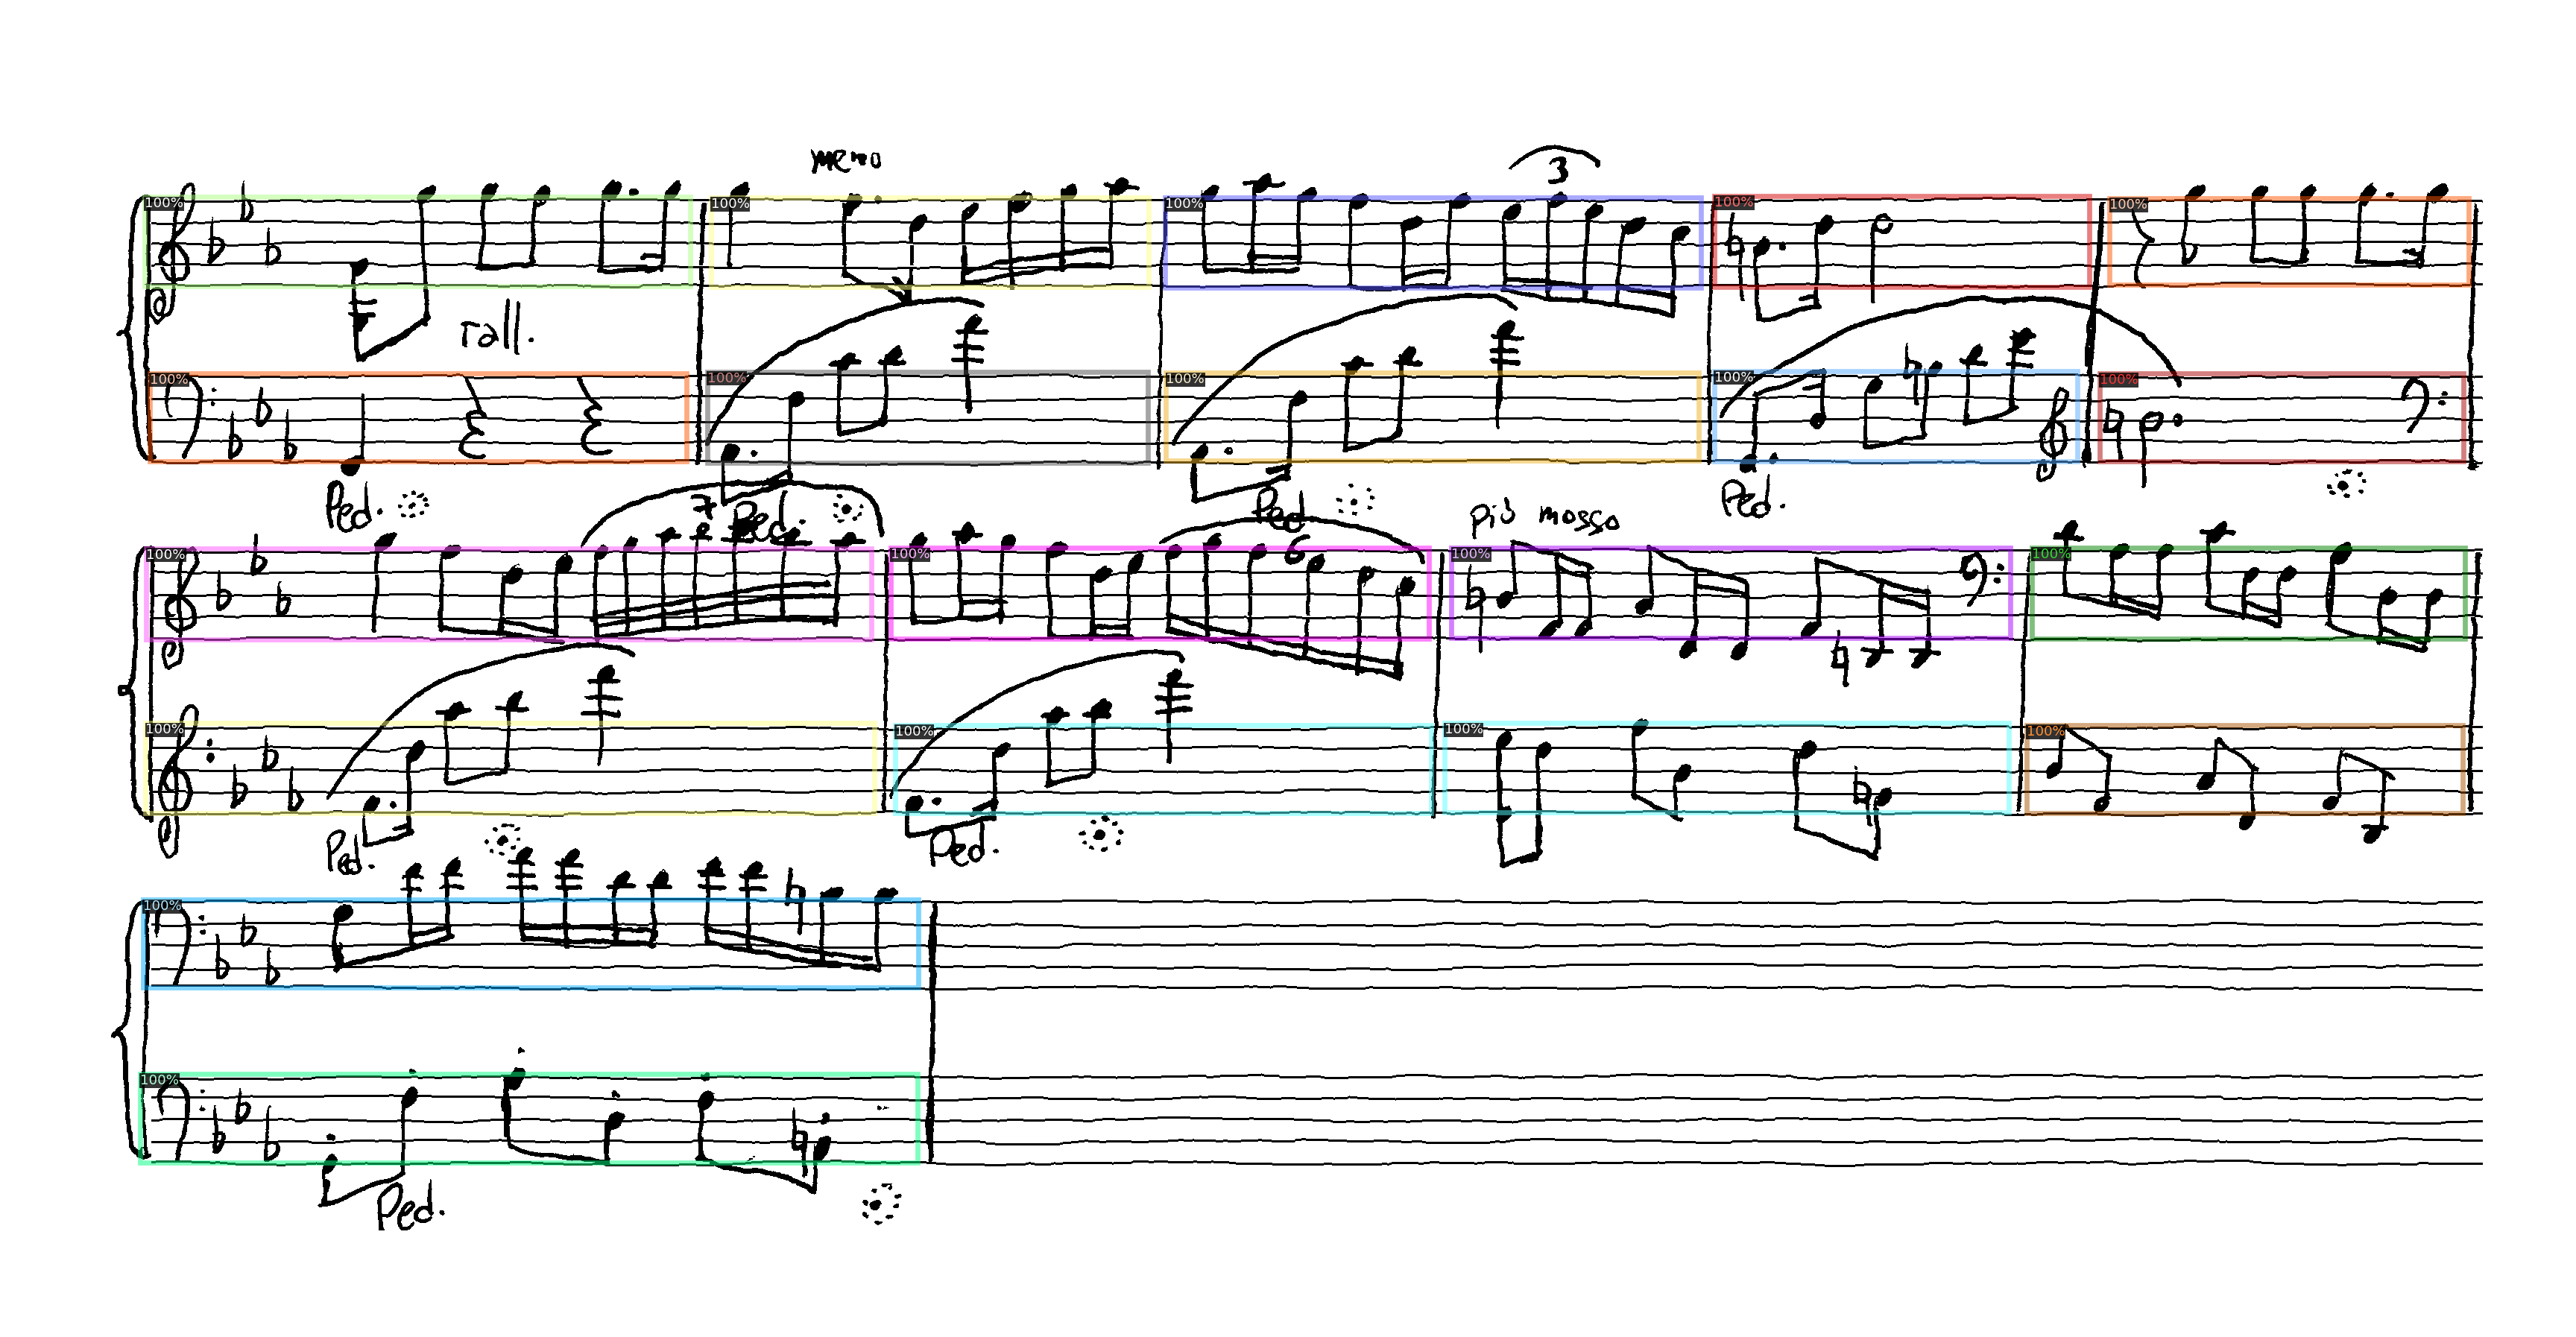

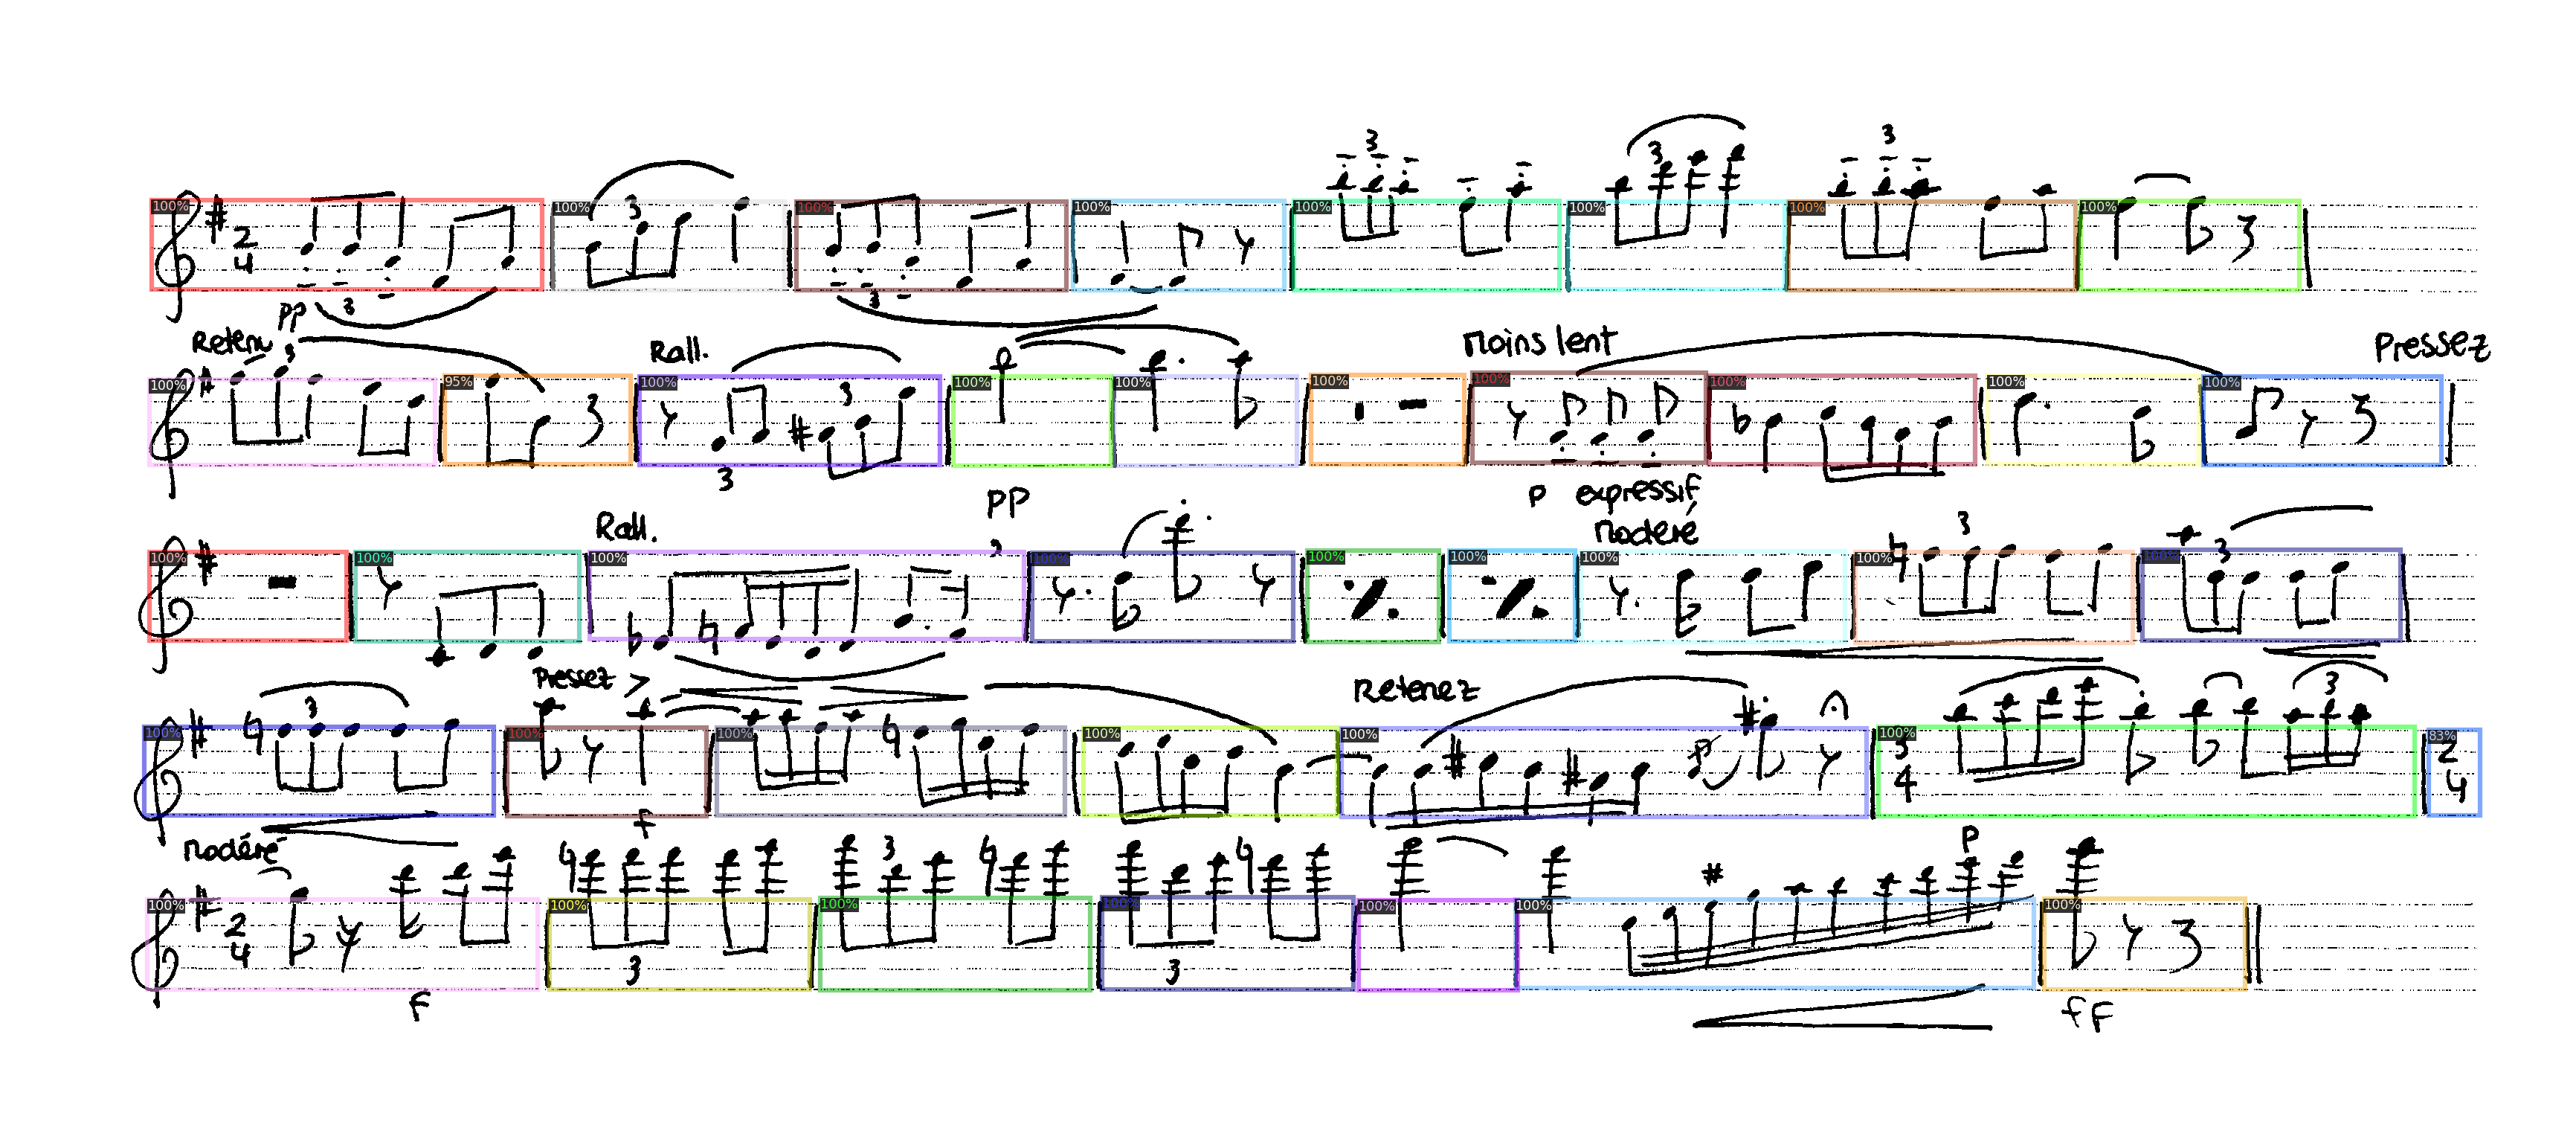

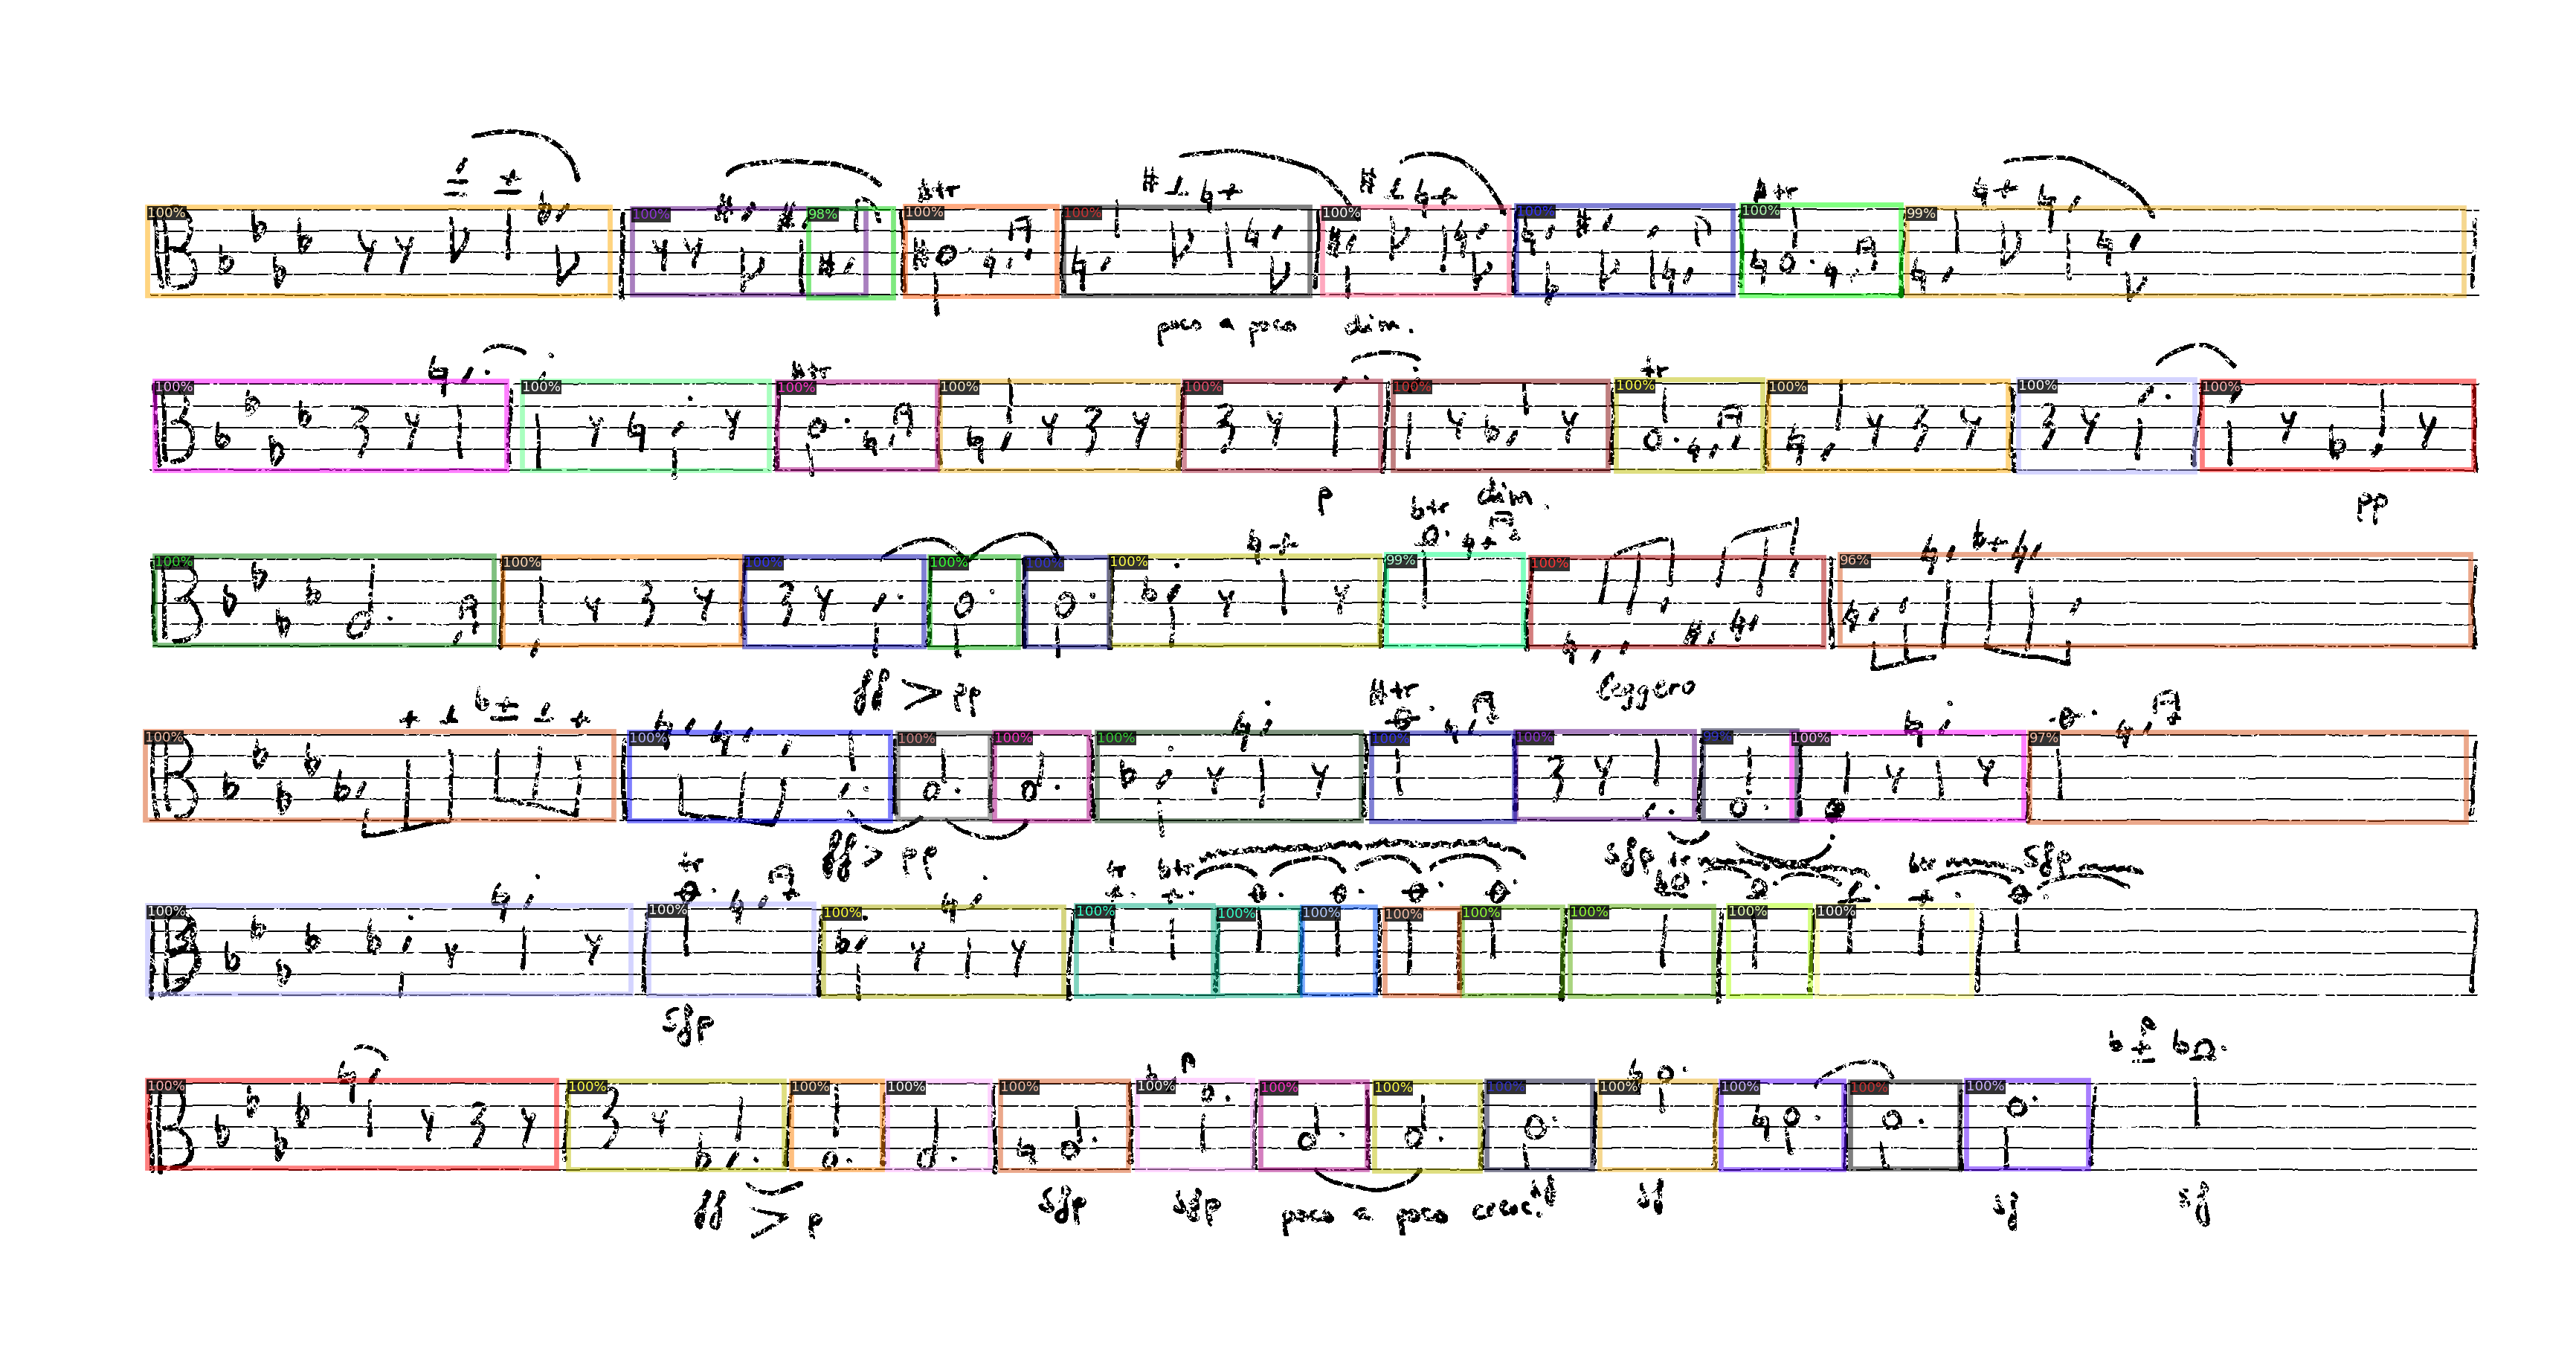

In [ ]:
displayRandomPredictData(test_data, muscima_metadata)

predict the validation dataset

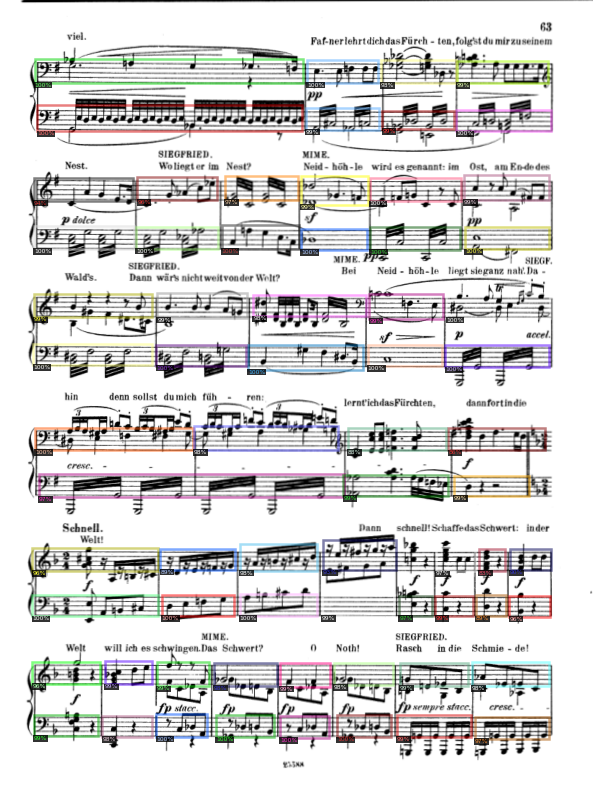

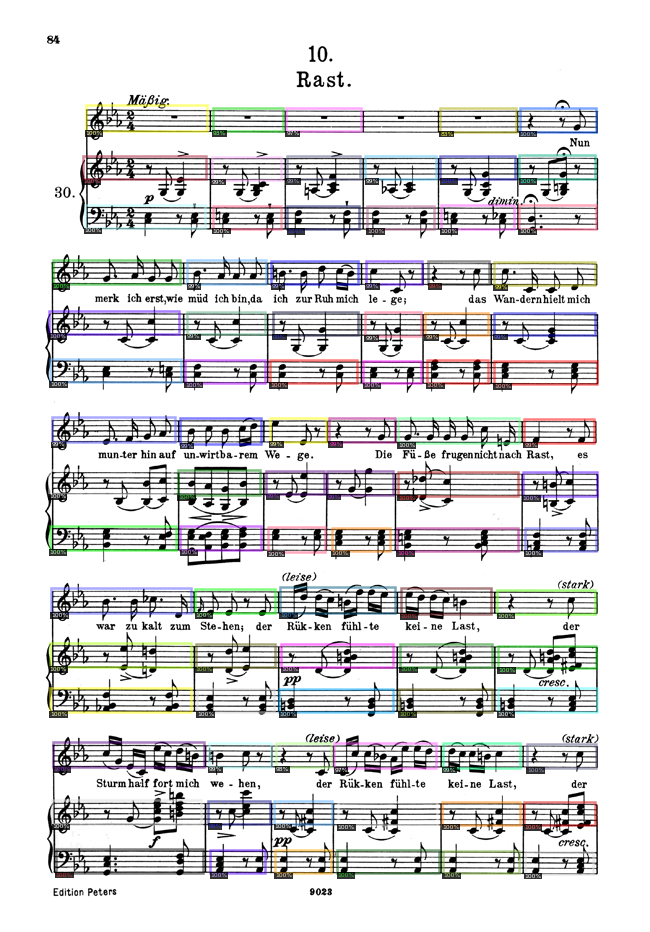

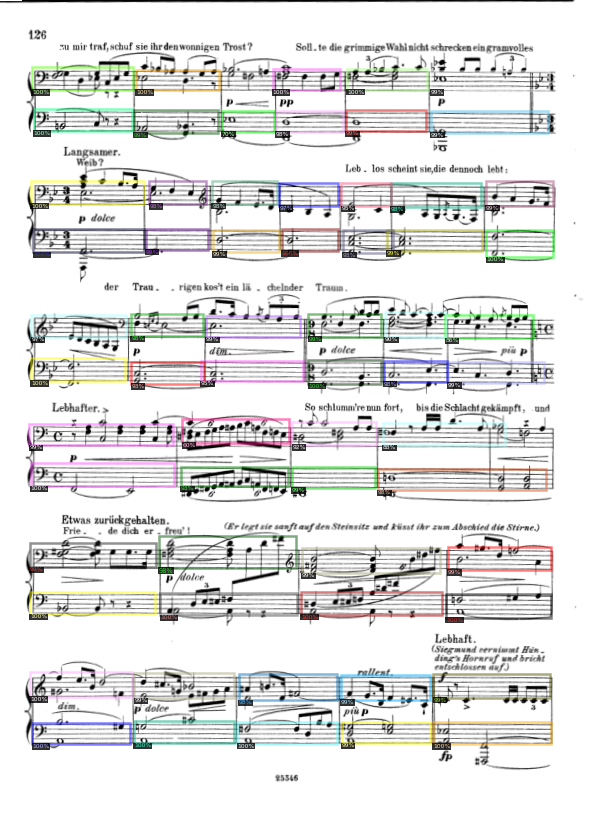

In [ ]:
displayRandomPredictData(val_data, validation_metadata)

We can evaluate its performance using AP metric implemented in COCO API.

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

def evaluateModel(test_data_name, cfg, out_dir, trainer):
    evaluator = COCOEvaluator(test_data_name, cfg, False, output_dir=out_dir)
    val_loader = build_detection_test_loader(cfg, test_data_name)
    inference_on_dataset(trainer.model, val_loader, evaluator)

Test the test dataset

In [ ]:
evaluateModel(test_data_name, cfg, model_output_dir, trainer)

WARNING [06/24 11:39:09 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'test_data'. Trying to convert it to COCO format ...
[06/24 11:39:09 d2.data.datasets.coco]: Converting annotations of dataset 'test_data' to COCO format ...)
[06/24 11:39:09 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[06/24 11:39:13 d2.data.datasets.coco]: Conversion finished, #images: 560, #annotations: 18371
[06/24 11:39:13 d2.data.datasets.coco]: Caching COCO format annotations at '/content/drive/My Drive/Colab Notebooks/Colab Data/models/AudioLabs_enhance_CVC_measure_model/test_data_coco_format.json' ...
[06/24 11:39:14 d2.data.build]: Distribution of instances among all 1 categories:
|   category    | #instances   |
|:-------------:|:-------------|
| stave_measu.. | 18371        |
|               |              |
[06/24 11:39:14 d2.data.common]: Serializing 560 elements to byte tensors and concatenating them all ...
[06/24 11:39:14 d2.data.common]: Seriali

Test the validation dataset with model <br>
Not very useful for stave measures since the validation dataset only has system measures

In [ ]:
# validation_coco_dir = os.path.join(root_dir, "models")

# evaluateModel(val_data_name, cfg, validation_coco_dir, trainer)

# Enhancement shenanigans:

# Fetch Raw Box Data from AudioLabs_coco_format

./AudioLabs/Wagner_WWV086C-1/img/Wagner_WWV086C_020.png
Boxes(tensor([[215.6864, 120.9245, 298.8358, 143.1669],
        [302.7712, 121.1690, 383.1208, 142.6061],
        [423.8779, 731.0209, 559.2575, 754.4752],
        [ 40.3729, 362.7215, 144.0269, 384.1324],
        [210.9809,  71.3651, 300.1351,  94.4344],
        [ 41.7341, 608.8311, 134.5980, 630.5976],
        [ 42.3890, 241.0457, 131.6686, 262.5165],
        [268.3744, 605.6740, 342.8307, 629.2228],
        [ 41.4256, 317.6023, 144.7595, 339.3977],
        [370.9988, 238.4098, 426.5881, 260.8049],
        [387.7041, 118.0145, 441.4843, 142.7657],
        [ 40.5749, 195.3777, 130.4417, 218.4012],
        [233.3072, 733.1394, 287.7850, 756.3038],
        [303.1801,  70.1814, 383.5015,  92.7270],
        [248.7983, 237.2286, 307.6935, 261.9168],
        [270.2247, 361.4937, 322.4731, 384.0681],
        [ 38.7529, 564.5133, 136.8882, 586.2295],
        [136.0518, 195.8453, 189.2271, 217.6206],
        [211.0280, 608.7564, 263.3469,

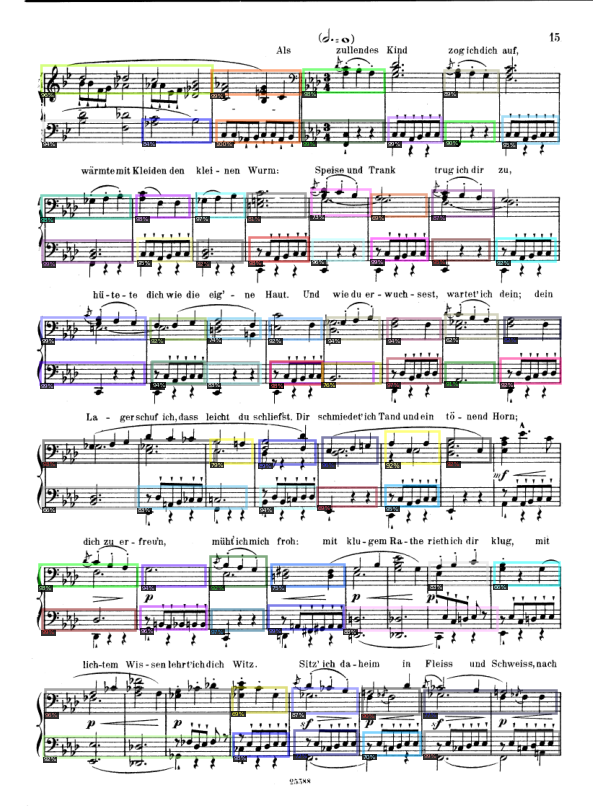

./AudioLabs/Wagner_WWV086B-3/img/Wagner_WWV086B_156.png
Boxes(tensor([[ 47.4864, 725.4701, 234.2177, 754.4333],
        [ 46.0052, 476.6051, 238.4770, 503.3807],
        [ 44.5729,  67.0980, 241.7032,  90.7707],
        [408.6183, 725.6992, 571.7575, 755.1964],
        [244.0564, 110.3174, 405.2187, 137.5799],
        [408.2013, 674.7895, 573.8859, 701.5248],
        [404.8837, 354.3169, 574.0471, 378.3177],
        [239.6645, 478.8139, 401.4914, 502.7666],
        [ 46.9072, 673.8368, 237.3885, 699.5029],
        [ 45.2838, 113.5252, 241.2201, 138.1566],
        [238.9084,  66.9149, 406.6042,  88.6999],
        [408.4806,  62.8640, 572.6701,  88.1591],
        [233.5013, 355.4763, 400.5806, 378.8813],
        [238.0025, 718.2717, 402.7457, 745.5167],
        [433.8940, 232.8404, 572.3024, 258.7598],
        [404.2582, 110.8281, 572.3227, 136.1513],
        [236.1708, 421.1528, 397.3588, 450.5350],
        [ 45.7443, 352.1374, 232.3049, 378.1796],
        [160.3884, 177.5910, 290.1357,

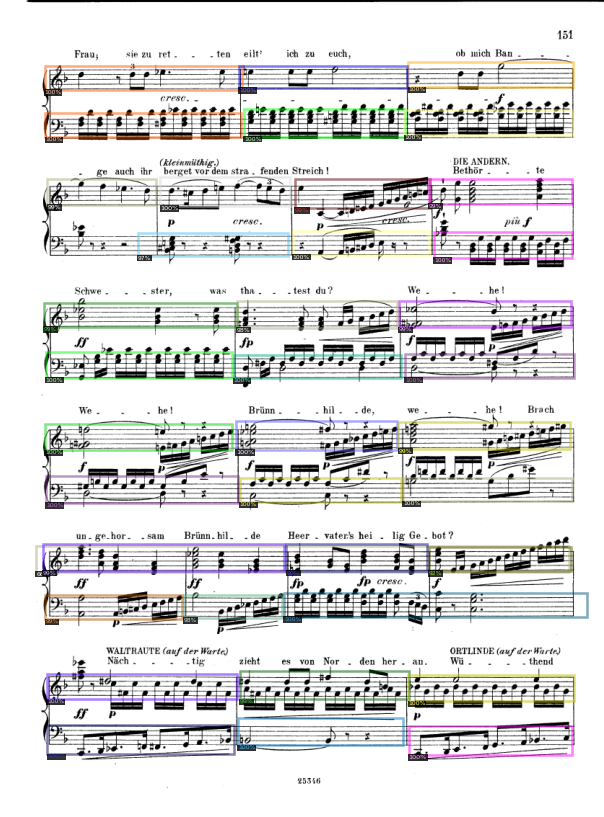

./AudioLabs/Wagner_WWV086B-2/img/Wagner_WWV086B_118.png
Boxes(tensor([[ 50.8657, 488.2429, 196.9207, 514.3624],
        [ 48.9697, 440.4535, 201.8304, 466.4785],
        [200.0279, 488.0523, 306.1801, 513.5318],
        [ 47.6920, 248.5803, 198.3165, 270.8807],
        [ 52.9513, 719.3130, 215.5085, 742.3096],
        [444.2510, 246.4600, 571.6524, 269.7360],
        [ 48.8987, 369.6870, 208.3538, 393.8623],
        [313.1183, 246.8438, 439.7093, 270.2795],
        [445.9741, 367.9942, 573.2184, 392.2156],
        [ 47.8778, 315.8913, 206.9906, 342.4607],
        [ 48.4425, 199.8617, 197.1006, 224.5750],
        [207.0011, 439.9838, 308.7137, 463.9514],
        [350.3659, 555.3180, 574.1351, 579.5121],
        [ 52.0803, 665.8149, 218.6824, 691.4569],
        [ 46.6486,  68.2715, 215.8825,  89.5876],
        [221.6847, 664.9177, 303.0025, 689.4523],
        [445.0097, 490.9675, 576.9230, 512.6146],
        [200.8359, 246.8387, 307.9645, 270.4192],
        [307.2684, 662.3943, 536.4432,

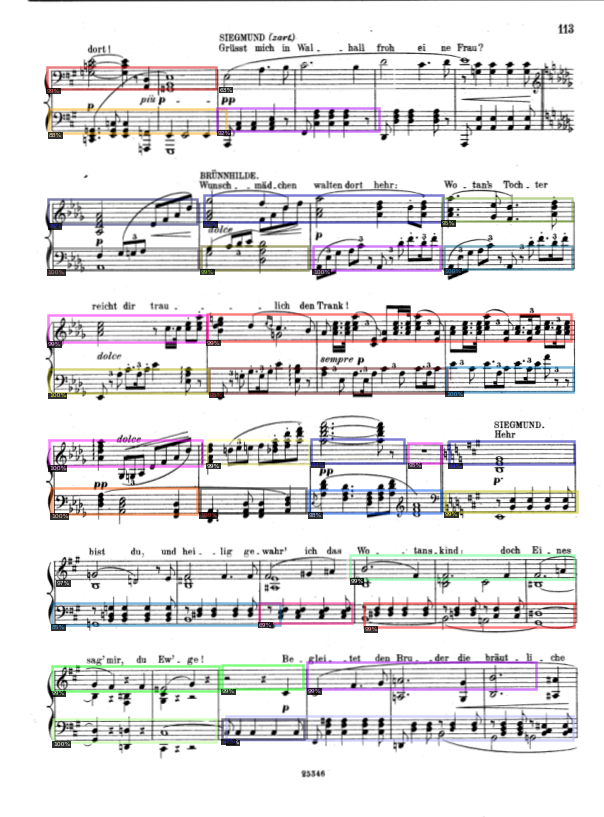

In [ ]:
for d in random.sample(val_data, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(d["file_name"])
    print(outputs["instances"].pred_boxes)

    v = Visualizer(im[:, :, ::-1], metadata=validation_metadata, scale=1)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
from PIL import Image, ImageDraw

def draw_bounding_boxes(image_path, bbox):
    img = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(img)

    top = bbox[0]
    left = bbox[1]
    bottom = bbox[2]
    right = bbox[3]

    points = (top, left), (bottom, left), (bottom, right), (top, right), (top, left)
    draw.line(points, fill="red", width=2)

    return img


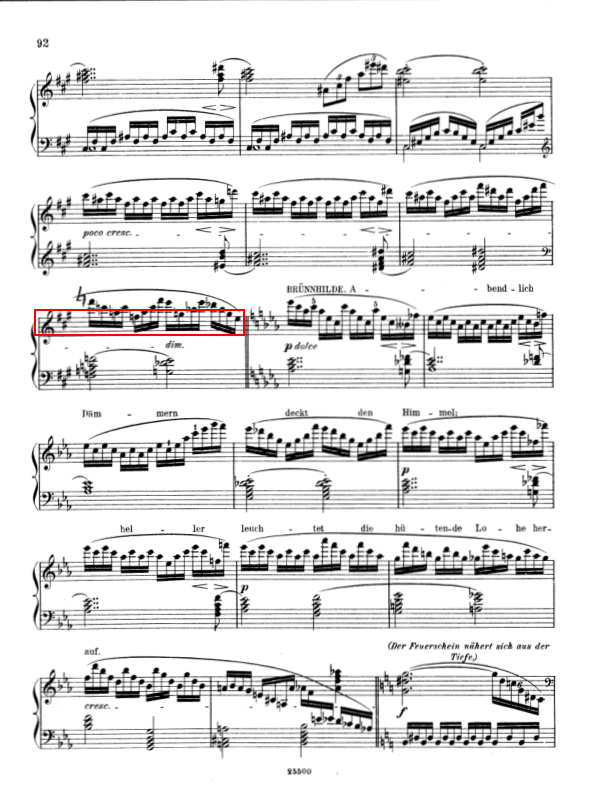

In [ ]:
box = [35.1576, 309.3797, 243.6722, 335.7020]
display(draw_bounding_boxes("./AudioLabs/Wagner_WWV086D-1/img/Wagner_WWV086D_095.png", box))

In [ ]:
print(outputs["instances"].pred_boxes[0])
print(outputs["instances"].pred_boxes[0].tensor.cpu().numpy()[0])

Boxes(tensor([[ 35.1576, 309.3797, 243.6722, 335.7020]], device='cuda:0'))
[ 35.157593 309.37967  243.67216  335.70197 ]


# get all boxes for one image:
./AudioLabs/Wagner_WWV086D-1/img/Wagner_WWV086D_095.png

In [ ]:
im = cv2.imread("./AudioLabs/Wagner_WWV086D-1/img/Wagner_WWV086D_095.png")
outputs = predictor(im)

all_boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
print(all_boxes)

[[ 35.157593 309.37967  243.67216  335.70197 ]
 [ 37.98188  556.0301   228.10248  580.3393  ]
 [379.48178  722.9932   553.6741   748.00476 ]
 [243.59225  128.39981  396.62292  155.63092 ]
 [ 34.94778  131.1045   241.17952  156.67755 ]
 [ 37.15296  438.39392  228.99278  463.00302 ]
 [ 39.116962 197.97156  244.8024   222.24658 ]
 [ 37.287025 606.6988   238.20285  629.1104  ]
 [376.8325   670.83514  554.4497   696.7317  ]
 [248.8763   197.37543  395.8685   220.56557 ]
 [399.94553  129.23312  548.8373   154.69365 ]
 [ 32.748222 367.1436   247.25594  389.42352 ]
 [238.60597  431.47043  391.67398  458.79724 ]
 [402.26755  196.43501  549.7587   219.68915 ]
 [245.33562  365.57706  426.86734  388.6249  ]
 [396.91922  432.5931   546.3539   459.14685 ]
 [ 34.17593  246.25584  256.56607  267.38846 ]
 [401.04434  487.45523  552.8479   508.4664  ]
 [ 36.34266  489.01443  232.1326   510.0416  ]
 [248.23203  309.50723  423.05246  335.342   ]
 [212.6988   672.38385  374.04343  697.9817  ]
 [ 37.088997 

sort the boxes by y values

In [ ]:
import numpy

sorted_array = all_boxes[numpy.argsort(all_boxes[:, 1])]
print(sorted_array)

[[390.03168   75.0256   548.3683    96.53894 ]
 [237.87874   75.07228  393.16528   98.29949 ]
 [ 37.088997  76.95671  236.9435    99.65711 ]
 [243.59225  128.39981  396.62292  155.63092 ]
 [399.94553  129.23312  548.8373   154.69365 ]
 [ 34.94778  131.1045   241.17952  156.67755 ]
 [402.26755  196.43501  549.7587   219.68915 ]
 [248.8763   197.37543  395.8685   220.56557 ]
 [ 39.116962 197.97156  244.8024   222.24658 ]
 [391.42758  244.70627  550.3465   266.58298 ]
 [ 29.612936 244.97133  563.6827   267.51697 ]
 [244.93683  245.76312  397.47806  266.82175 ]
 [ 34.17593  246.25584  256.56607  267.38846 ]
 [ 35.157593 309.37967  243.67216  335.70197 ]
 [248.23203  309.50723  423.05246  335.342   ]
 [425.39194  309.74637  548.48987  338.44043 ]
 [245.33562  365.57706  426.86734  388.6249  ]
 [424.5466   365.99924  551.97473  388.47476 ]
 [ 32.748222 367.1436   247.25594  389.42352 ]
 [238.60597  431.47043  391.67398  458.79724 ]
 [396.91922  432.5931   546.3539   459.14685 ]
 [ 37.15296  

get only the y values for y_top and y_bottom

In [ ]:
def get_y_top_bottom(bboxes, y_top_ID, y_bottom_ID):
    y_top = []
    y_bottom = []

    sorted_array = bboxes[numpy.argsort(bboxes[:, 1])]

    for box in sorted_array:
        y_top.append(box[y_top_ID])
        y_bottom.append(box[y_bottom_ID])

    return y_top, y_bottom

In [ ]:
y_top, y_bottom = get_y_top_bottom(sorted_array, 1, 3)
print(y_top)
print(y_bottom)
print(len(y_top), len(y_bottom))

[75.0256, 75.07228, 76.95671, 128.39981, 129.23312, 131.1045, 196.43501, 197.37543, 197.97156, 244.70627, 244.97133, 245.76312, 246.25584, 309.37967, 309.50723, 309.74637, 365.57706, 365.99924, 367.1436, 431.47043, 432.5931, 438.39392, 487.45523, 487.95416, 489.01443, 555.05347, 556.0301, 556.5953, 606.61633, 606.6988, 669.1873, 670.83514, 672.38385, 722.9932, 725.9435]
[96.53894, 98.29949, 99.65711, 155.63092, 154.69365, 156.67755, 219.68915, 220.56557, 222.24658, 266.58298, 267.51697, 266.82175, 267.38846, 335.70197, 335.342, 338.44043, 388.6249, 388.47476, 389.42352, 458.79724, 459.14685, 463.00302, 508.4664, 509.13205, 510.0416, 579.71515, 580.3393, 577.1635, 628.0081, 629.1104, 696.6031, 696.7317, 697.9817, 748.00476, 748.51917]
35 35


get the average y values for a given y array

In [ ]:
def get_average_y_values(y):
    average_y_values = []
    curr_reference_value = -1
    average_value = 0
    values_found = 1

    for value in y:
        if curr_reference_value == -1:
            curr_reference_value = value
            average_value = value
            values_found = 1
        elif value > curr_reference_value + 10:
            average_y_values.append(average_value / values_found)
            curr_reference_value = value
            average_value = value
            values_found = 1
        else:
            average_value += value
            values_found += 1
            
    average_y_values.append(average_value / values_found)

    return average_y_values

In [ ]:
y_top_average = get_average_y_values(y_top)
y_bottom_average = get_average_y_values(y_bottom)
print(y_top_average)
print(y_bottom_average)
print(len(y_top_average), len(y_bottom_average))

[75.68486022949219, 129.57914225260416, 197.26066080729166, 245.4241485595703, 309.54443359375, 366.2399495442708, 434.1525065104167, 488.1412760416667, 555.8929036458334, 606.6575927734375, 670.8020833333334, 724.4683837890625]
[98.16518147786458, 155.6673787434896, 220.8337605794271, 267.0775451660156, 336.4947916666667, 388.841064453125, 460.3157145182292, 509.2133382161458, 579.0726725260416, 628.5592651367188, 697.10546875, 748.261962890625]
12 12


In [ ]:
def measure_lines(data_dir):
    data = []

    for folder in tqdm(os.listdir(data_dir)):
        if not os.path.isdir(os.path.join(data_dir, folder)) or folder == "jupyter":
            continue
        df = pd.read_csv(os.path.join(data_dir, folder, folder + ".csv"))
        img_directory = os.path.join(data_dir, folder, "img")
        for img in os.listdir(img_directory):
            path_to_image_file = os.path.join(img_directory, img)
            df_page = df[df["Image"] == os.path.basename(path_to_image_file)]
            bboxes = df_page[['RowIndex', 'X', 'Y', 'Height', 'Width']].values
            return bboxes
            break
        break

In [ ]:
test_boxes = measure_lines("./AudioLabs")

  0%|          | 0/46 [00:00<?, ?it/s]


In [ ]:
print(test_boxes)

[[  0  47  88  65 137]
 [  0 185  88  65  65]
 [  0 251  88  65  74]
 [  0 326  88  65  94]
 [  0 421  88  65  69]
 [  0 491  88  65  74]
 [  1  48 216  72 148]
 [  1 197 216  72 112]
 [  1 310 216  72  86]
 [  1 397 216  72  92]
 [  1 490 216  72  76]
 [  2  48 342  65 187]
 [  2 236 342  65 159]
 [  2 396 342  65 170]
 [  3  48 460  67 146]
 [  3 195 460  67  61]
 [  3 257 460  67  89]
 [  3 347 460  67  47]
 [  3 395 460  67  75]
 [  3 471 460  67  96]
 [  4  48 577  64  99]
 [  4 148 577  64  71]
 [  4 220 577  64  72]
 [  4 293 577  64  69]
 [  4 363 577  64  71]
 [  4 435 577  64 132]
 [  5  48 700  66 171]
 [  5 220 700  66 142]
 [  5 363 700  66 147]
 [  5 511 700  66  57]]


In [ ]:
print(test_boxes[0])
print(len(test_boxes))

[  0  47  88  65 137]
30


#Get enhanced data for one image

helper functions here

In [ ]:
import pandas as pd
import numpy
import os

def get_y_top_bottom(bboxes, y_top_ID, y_bottom_ID):
    y_top = []
    y_bottom = []

    sorted_array = bboxes[numpy.argsort(bboxes[:, 1])]

    for box in sorted_array:
        y_top.append(box[y_top_ID])
        y_bottom.append(box[y_bottom_ID])

    return y_top, y_bottom

def get_average_y_values(y):
    average_y_values = []
    curr_reference_value = -1
    average_value = 0
    values_found = 1

    for value in y:
        if curr_reference_value == -1:
            curr_reference_value = value
            average_value = value
            values_found = 1
        elif value > curr_reference_value + 20:
            average_y_values.append(average_value / values_found)
            curr_reference_value = value
            average_value = value
            values_found = 1
        else:
            average_value += value
            values_found += 1
            
    average_y_values.append(average_value / values_found)

    return average_y_values

# this actually gets measure row values not system values
def get_system_values_by_rowIdx(bboxes): # [system_idx, x_left, x_right, y_top, y_bottom]
    last_idx = -1
    curr_left = 0
    curr_right = 0

    array = []

    for i in range(0, len(bboxes)):
        idx = bboxes[i][0]
        if idx > last_idx:
            curr_left = bboxes[i][1] # x
            last_idx = idx
        if i+1 < len(bboxes) and bboxes[i+1][0] > last_idx:
            curr_right = bboxes[i][1] + bboxes[i][4] # x + width
            array.append([last_idx, curr_left, curr_right, bboxes[i][2], bboxes[i][2] + bboxes[i][3]])
        if i == len(bboxes) - 1:
            curr_right = bboxes[i][1] + bboxes[i][4] # x + width
            array.append([last_idx, curr_left, curr_right, bboxes[i][2], bboxes[i][2] + bboxes[i][3]])
    
    return array

def is_in_system(y, height, system):
    y_bottom = y + height
    system_y_top = system[3]
    system_y_bottom = system[4]

    if y+10 > system_y_top and y_bottom-10 < system_y_bottom:
        return True
    return False

def sort_val_data(e):
    return e["file_name"]

def save_to_csv(val_data, i, postfix):
    prev_file_path = val_data[i-1]["file_name"]

    prev_path_split = prev_file_path.split("/")
    prev_folder_name = prev_path_split[2]

    # csv_path = os.path.join(prev_path_split[0], prev_path_split[1], prev_folder_name, prev_folder_name + "_staves.csv")
    csv_path = os.path.join(root_dir, prev_path_split[1], prev_folder_name, prev_folder_name + postfix + ".csv")
    
    print("saving to : " + csv_path)
    data_frame.to_csv(csv_path, index=False)

# Define a dataframe to hold all the data

In [ ]:
data = {"Index" : [],
        "StaveIndex" : [], # total number of rows for the entire piece
        "SystemIndex" : [], # number of rows for one page
        "Left" : [],
        "Top" : [],
        "Height" : [],
        "Width" : [],
        "Image" : []
        }
data_frame = pd.DataFrame(data, columns = ["Index", "StaveIndex", "SystemIndex", "Left", "Top", "Height", "Width", "Image"], dtype='int32')
data_frame.head()

Empty DataFrame
Columns: [Idx, StaveIdx, SystemIdx, Left, Top, Height, Width, Image]
Index: []

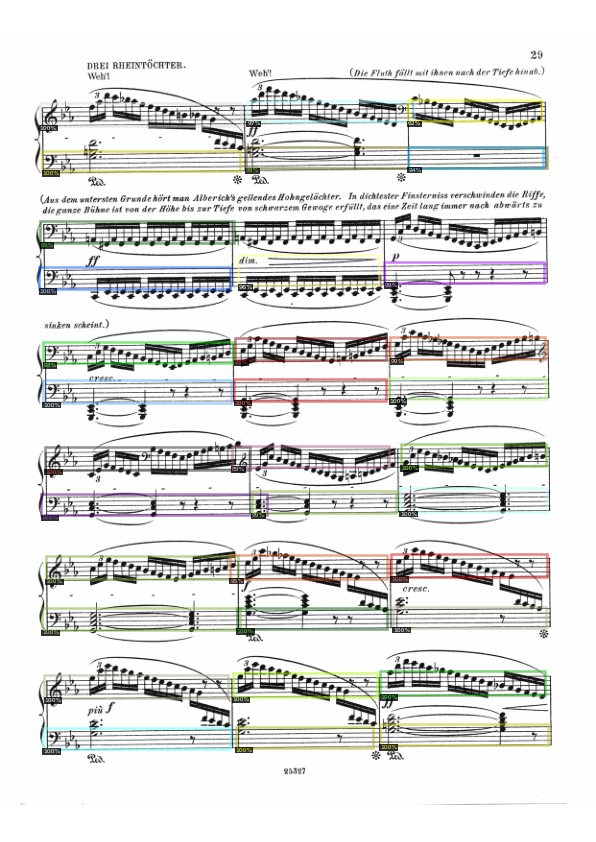

found 12 staves
found 6 systems


In [ ]:
# im = cv2.imread("./AudioLabs/Wagner_WWV086D-1/img/Wagner_WWV086D_095.png")
# im = cv2.imread("./AudioLabs/Chorissimo_Blue105/img/Chorissimo_Blue105_000.png")
im = cv2.imread("./AudioLabs/Wagner_WWV086A/img/Wagner_WWV086A_030.png")

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], metadata=validation_metadata, scale=1)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

all_boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
sorted_array = all_boxes[numpy.argsort(all_boxes[:, 1])]
y_top, y_bottom = get_y_top_bottom(sorted_array, 1, 3)
y_top_average = get_average_y_values(y_top)
y_bottom_average = get_average_y_values(y_bottom)

print("found " + str(len(y_top_average)) + " staves")

if len(y_top_average) != len(y_bottom_average):
    print("there might be problem here, y_top_average not same size as y_bottom_average!")
    print("y_top_average len : " + str(len(y_top_average)), "y_bottom_average len : " + str(len(y_bottom_average)))

df = pd.read_csv("./AudioLabs/Wagner_WWV086A/Wagner_WWV086A.csv")
df_page = df[df["Image"] == os.path.basename("./AudioLabs/Wagner_WWV086A/img/Wagner_WWV086A_030.png")]
bboxes = df_page[['RowIndex', 'X', 'Y', 'Height', 'Width']].values
system_values_rowIdx = get_system_values_by_rowIdx(bboxes) # len(x_for_rowIdx) = how many systems

print("found " + str(len(system_values_rowIdx)) + " systems")

idx = 1
row_idx = 1

for i in range(0, len(y_top_average)): # for all the staves that where found
    y = y_top_average[i]
    height = y_bottom_average[i] - y_top_average[i]

    # check in which system they fit
    for system in system_values_rowIdx:
        if is_in_system(y, height, system):
            reference_system = system
            break

    # use that systems x coordinates to determine x bounds
    x = reference_system[1]
    width = reference_system[2] - x

    data_row = pd.DataFrame({"Idx" : [idx],
        "StaveIndex" : [row_idx],
        "SystemIndex" : [reference_system[0]+1],
        "Left" : [x],
        "Top" : [(int)(y)],
        "Height" : [(int)(height)],
        "Width" : [width],
        "Image" : ["Wagner_WWV086A_030.png"]
        })
    
    idx += 1
    row_idx += 1

    data_frame = data_frame.append(data_row, ignore_index=True)

In [ ]:
data_frame.head(10)

Idx  StaveIdx  SystemIdx  Left  Top  Height  Width                   Image
0    0         0          0    42  101      21    502  Wagner_WWV086A_030.png
1    1         1          0    42  149      20    502  Wagner_WWV086A_030.png
2    2         2          1    44  221      22    500  Wagner_WWV086A_030.png
3    3         3          1    44  262      24    500  Wagner_WWV086A_030.png
4    4         4          2    45  339      21    502  Wagner_WWV086A_030.png
5    5         5          2    45  379      21    502  Wagner_WWV086A_030.png
6    6         6          3    46  446      21    501  Wagner_WWV086A_030.png
7    7         7          3    46  491      22    501  Wagner_WWV086A_030.png
8    8         8          4    46  555      23    502  Wagner_WWV086A_030.png
9    9         9          4    46  607      21    502  Wagner_WWV086A_030.png

# display the bounding boxes that where found

In [ ]:
from PIL import Image, ImageDraw

def draw_boxes(image_path, df_page):
    print(image_path)
    img = Image.open(image_path).convert('RGB')
    bboxes = df_page[['Left', 'Top', 'Height', 'Width']].values
    draw = ImageDraw.Draw(img)
    
    for x, y, h, w in bboxes:
        x1, y1 = x, y
        x2, y2 = (x + w), (y + h)
        points = (x1, y1), (x2, y1), (x2, y2), (x1, y2), (x1, y1)
        draw.line(points, fill='red', width=2)
    
    return img

./AudioLabs/Wagner_WWV086A/img/Wagner_WWV086A_030.png


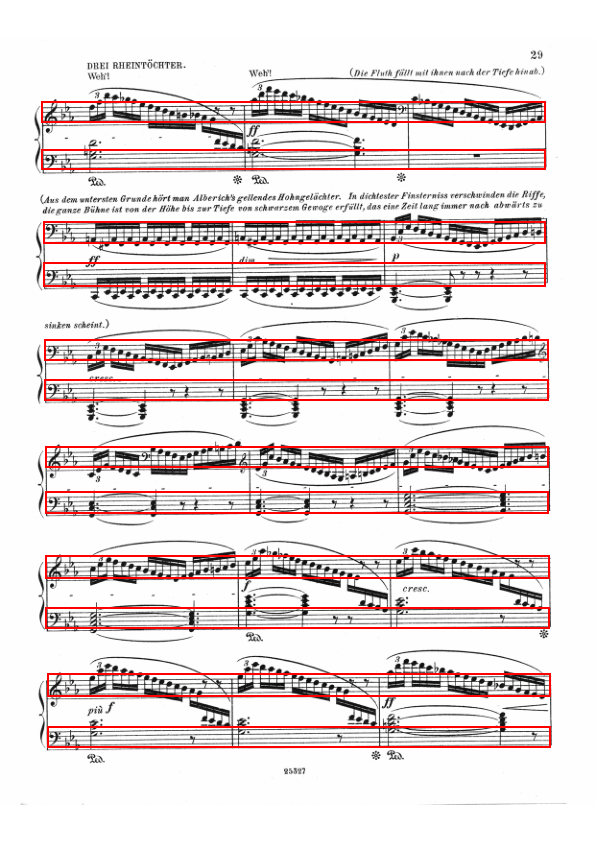

In [ ]:
img = draw_boxes("./AudioLabs/Wagner_WWV086A/img/Wagner_WWV086A_030.png", data_frame)
display(img)

# now do it for all images

In [ ]:
val_data.sort(key=sort_val_data)

current_folder = ""

for i in range(0, len(val_data)):
    filename = val_data[i]["file_name"]
    split_filename_string = filename.split("/")
    foldername = split_filename_string[2]
    imagename = split_filename_string[4]

    if foldername != current_folder:
        if current_folder != "": # dont save csv on first iteration
            save_to_csv(val_data, i, "_staves")

        current_folder = foldername

        idx = 1

        data = {"Index" : [], # total number of rows for the entire piece
            "StaveIndex" : [], # number of rows for one page
            "SystemIndex" : [],
            "Left" : [],
            "Top" : [],
            "Height" : [],
            "Width" : [],
            "Image" : []
            }
        data_frame = pd.DataFrame(data, columns = ["Index", "StaveIndex", "SystemIndex", "Left", "Top", "Height", "Width", "Image"], dtype='int32')

    print("filename : " + filename)

    im = cv2.imread(filename)
    outputs = predictor(im)
    all_boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
    sorted_array = all_boxes[numpy.argsort(all_boxes[:, 1])]
    y_top, y_bottom = get_y_top_bottom(sorted_array, 1, 3)
    y_top_average = get_average_y_values(y_top)
    y_bottom_average = get_average_y_values(y_bottom)

    if len(y_top_average) != len(y_bottom_average):
        print("there might be problem here, y_top_average not same size as y_bottom_average!")
        print("y_top_average len : " + str(len(y_top_average)), "y_bottom_average len : " + str(len(y_bottom_average)))

    original_csv_path = os.path.join(split_filename_string[0],split_filename_string[1], foldername, foldername + ".csv")
    df = pd.read_csv(original_csv_path)
    df_page = df[df["Image"] == os.path.basename(filename)]
    bboxes = df_page[['RowIndex', 'X', 'Y', 'Height', 'Width']].values
    system_values_rowIdx = get_system_values_by_rowIdx(bboxes)

    row_idx = 1

    for i in range(0, len(y_top_average)): # for all the staves that where found
        y = y_top_average[i]
        height = y_bottom_average[i] - y_top_average[i]

        # check in which system they fit
        for system in system_values_rowIdx:
            if is_in_system(y, height, system):
                reference_system = system
                break

        # use that systems x coordinates to determine x bounds
        x = reference_system[1]
        width = reference_system[2] - x

        data_row = pd.DataFrame({"Index" : [idx],
            "StaveIndex" : [row_idx],
            "SystemIndex" : [reference_system[0] + 1],
            "Left" : [x],
            "Top" : [(int)(y)],
            "Height" : [(int)(height)],
            "Width" : [width],
            "Image" : [imagename]
            })

        idx += 1
        row_idx += 1

        data_frame = data_frame.append(data_row, ignore_index=True)

# to make sure the last folder gets saved aswel
save_to_csv(val_data, len(val_data), "_staves")
print("All done")

filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_000.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_001.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_002.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_003.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_004.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_005.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_006.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_007.png
saving to : /content/drive/My Drive/Colab Notebooks/Colab Data/AudioLabs/Beethoven_Op026-01/Beethoven_Op026-01_staves.csv
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_000.png
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_001.png
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_002.png
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_003.png
fi

# making sure all stave annotations are good by looking at all of them

In [ ]:
from PIL import Image, ImageDraw

def draw_bounding_boxes(piece_name, directory_dataset='', postfix=''):
    directory_img = os.path.join(directory_dataset, piece_name, 'img')
    page_names = sorted(os.listdir(directory_img))

    for page in page_names:
        img_path = os.path.join(directory_dataset, piece_name, 'img', page)
        csv_path = os.path.join(directory_dataset, piece_name, piece_name + postfix + ".csv")
        
        df = pd.read_csv(csv_path)
        df_page = df[df['Image'] == os.path.basename(img_path)]
        bboxes = df_page[['Left', 'Top', 'Height', 'Width']].values

        img = Image.open(img_path).convert('RGB')
        draw = ImageDraw.Draw(img)
        
        for x, y, h, w in bboxes:
            x1, y1 = x, y
            x2, y2 = (x + w), (y + h)
            points = (x1, y1), (x2, y1), (x2, y2), (x1, y2), (x1, y1)
            draw.line(points, fill='red', width=2)

        print(img_path)
        display(img)

In [ ]:
source_dir = os.path.join(root_dir, "AudioLabs")

draw_bounding_boxes("Beethoven_Op026-01", directory_dataset=source_dir, postfix="_staves")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
draw_bounding_boxes("Beethoven_Op090-01", directory_dataset=source_dir, postfix="_staves")

Output hidden; open in https://colab.research.google.com to view.

# Now determine the idividual measures - first for one image

helper functions:

In [ ]:
def get_system_bounds(bboxes): # returns [system_idx, x_left, x_right, y_top, y_bottom]
    last_idx = -1
    curr_left = 0
    curr_right = 0

    array = []

    for i in range(0, len(bboxes)):
        idx = bboxes[i][0]
        if idx > last_idx:
            curr_left = bboxes[i][1] # x
            last_idx = idx
        if i+1 < len(bboxes) and bboxes[i+1][0] > last_idx:
            curr_right = bboxes[i][1] + bboxes[i][4] # x + width
            array.append([last_idx, curr_left, curr_right, bboxes[i][2], bboxes[i][2] + bboxes[i][3]])
        if i == len(bboxes) - 1:
            curr_right = bboxes[i][1] + bboxes[i][4] # x + width
            array.append([last_idx, curr_left, curr_right, bboxes[i][2], bboxes[i][2] + bboxes[i][3]])
    
    return array

dataframe to hold the data for us again

In [ ]:
data = {"Index" : [], # total number of rows for the entire piece
        "MeasureIndex" : [], # number of rows for one page
        "SystemIndex" : [], # the systemIdx in which this measure exists
        "StaveIndex" : [], # the staveIdx in which this measure exists
        "Left" : [],
        "Top" : [],
        "Height" : [],
        "Width" : [],
        "Image" : []
        }
data_frame = pd.DataFrame(data, columns = ["Index", "MeasureIndex", "SystemIndex", "StaveIndex", "Left", "Top", "Height", "Width", "Image"], dtype='int32')
data_frame.head()

Empty DataFrame
Columns: [Idx, MeasureIdx, SystemIdx, StaveIdx, Left, Top, Height, Width, Image]
Index: []

In [ ]:
foldername = "Beethoven_Op026-01"
imagename = "Beethoven_Op026-01_000.png"

df = pd.read_csv(os.path.join(root_dir, "AudioLabs", foldername, foldername + ".csv"))
df_page = df[df['Image'] == imagename]
system_measures = df_page[['RowIndex', 'X', 'Y', 'Height', 'Width']].values

df = pd.read_csv(os.path.join(root_dir, "AudioLabs", foldername, foldername + "_staves.csv"))
df_page = df[df['Image'] == imagename]
bboxes = df_page[['StaveIndex', 'Left', 'Top', 'Height', 'Width']].values

system_bounds = get_system_bounds(system_measures)

idx = 1
measure_idx = 1

for stave in bboxes:
    for system in system_bounds:
        if is_in_system(stave[2], stave[3], system): # does the stave fit into the system
            reference_system = system
            break

    # get all system measures from the reference_system
    reference_system_measures = np.array([], dtype=np.int64).reshape(0,5)
    for system in system_measures:
        if system[0] == reference_system[0]:
            reference_system_measures = np.vstack([reference_system_measures, system])

    # split the stave with the reference system annotations by
    # y_top and y_bottom of the stave but the x_left and x_right of the reference system
    system_idx = reference_system[0] + 1
    for measure in reference_system_measures:
        stave_idx = stave[0] + 1
        x = measure[1]
        y = stave[2]
        height = stave[3]
        width = measure[4]

        data_row = pd.DataFrame({"Index" : [idx],
            "MeasureIndex" : [measure_idx],
            "SystemIndex" : [system_idx],
            "StaveIndex" : [stave_idx],
            "Left" : [x],
            "Top" : [y],
            "Height" : [height],
            "Width" : [width],
            "Image" : [imagename]
            })
        
        idx += 1
        measure_idx += 1

        data_frame = data_frame.append(data_row, ignore_index=True)

In [ ]:
data_frame.head(30)

Idx  MeasureIdx  SystemIdx  ...  Height  Width                       Image
0     0           0          0  ...      32    111  Beethoven_Op026-01_000.png
1     1           1          0  ...      32     79  Beethoven_Op026-01_000.png
2     2           2          0  ...      32    123  Beethoven_Op026-01_000.png
3     3           3          0  ...      32     84  Beethoven_Op026-01_000.png
4     4           4          0  ...      32    137  Beethoven_Op026-01_000.png
5     5           5          0  ...      32     81  Beethoven_Op026-01_000.png
6     6           6          0  ...      31    111  Beethoven_Op026-01_000.png
7     7           7          0  ...      31     79  Beethoven_Op026-01_000.png
8     8           8          0  ...      31    123  Beethoven_Op026-01_000.png
9     9           9          0  ...      31     84  Beethoven_Op026-01_000.png
10   10          10          0  ...      31    137  Beethoven_Op026-01_000.png
11   11          11          0  ...      31     81  Beethoven_Op026-01_000.png
12   12          12          1  ...      33    131  Beethoven_Op026-01_000.png
13   13          13          1  ...      33     69  Beethoven_Op026-01_000.png
14   14          14          1  ...      33     96  Beethoven_Op026-01_000.png
15   15          15          1  ...      33     88  Beethoven_Op026-01_000.png
16   16          16          1  ...      33     97  Beethoven_Op026-01_000.png
17   17          17          1  ...      33     66  Beethoven_Op026-01_000.png
18   18          18          1  ...      33    116  Beethoven_Op026-01_000.png
19   19          19          1  ...      30    131  Beethoven_Op026-01_000.png
20   20          20          1  ...      30     69  Beethoven_Op026-01_000.png
21   21          21          1  ...      30     96  Beethoven_Op026-01_000.png
22   22          22          1  ...      30     88  Beethoven_Op026-01_000.png
23   23          23          1  ...      30     97  Beethoven_Op026-01_000.png
24   24          24          1  ...      30     66  Beethoven_Op026-01_000.png
25   25          25          1  ...      30    116  Beethoven_Op026-01_000.png
26   26          26          2  ...      32    128  Beethoven_Op026-01_000.png
27   27          27          2  ...      32     72  Beethoven_Op026-01_000.png
28   28          28          2  ...      32     92  Beethoven_Op026-01_000.png
29   29          29          2  ...      32     71  Beethoven_Op026-01_000.png

[30 rows x 9 columns]

./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_000.png


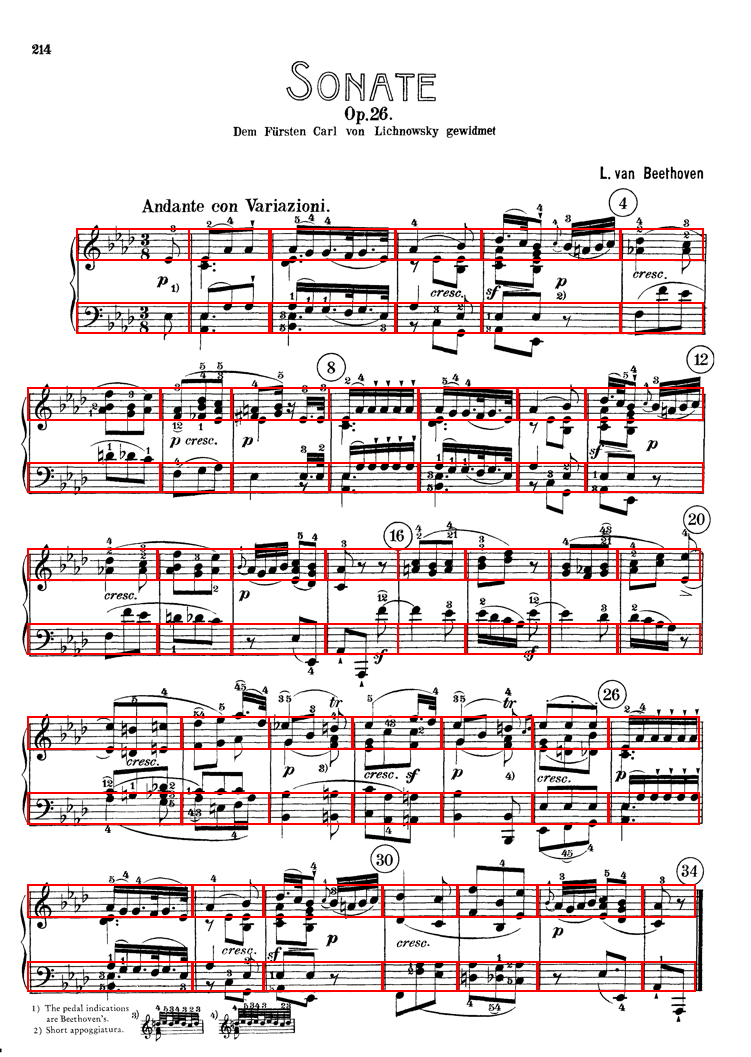

In [ ]:
img = draw_boxes("./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_000.png", data_frame)
display(img)

# then for all the images:

In [ ]:
val_data.sort(key=sort_val_data)

current_folder = ""

for i in range(0, len(val_data)):
    filename = val_data[i]["file_name"]
    split_filename_string = filename.split("/")
    foldername = split_filename_string[2]
    imagename = split_filename_string[4]

    if foldername != current_folder:
        if current_folder != "": # dont save csv on first iteration
            save_to_csv(val_data, i, "_measures")

        current_folder = foldername
        idx = 1

        data = {"Index" : [], # total number of rows for the entire piece
            "MeasureIndex" : [], # number of rows for one page
            "SystemIndex" : [], # the systemIdx in which this measure exists
            "StaveIndex" : [], # the staveIdx in which this measure exists
            "Left" : [],
            "Top" : [],
            "Height" : [],
            "Width" : [],
            "Image" : []
            }
        data_frame = pd.DataFrame(data, columns = ["Index", "MeasureIndex", "SystemIndex", "StaveIndex", "Left", "Top", "Height", "Width", "Image"], dtype='int32')

    print("filename : " + filename)

    df = pd.read_csv(os.path.join(root_dir, "AudioLabs", foldername, foldername + ".csv"))
    df_page = df[df['Image'] == imagename]
    system_measures = df_page[['RowIndex', 'X', 'Y', 'Height', 'Width']].values

    df = pd.read_csv(os.path.join(root_dir, "AudioLabs", foldername, foldername + "_staves_corrected.csv"))
    val_data.sort(key=sort_val_data)
    df_page = df[df['Image'] == imagename]
    bboxes = df_page[['RowIndex', 'X', 'Y', 'Height', 'Width']].values

    system_bounds = get_system_bounds(system_measures)
    measure_idx = 1

    for stave in bboxes:
        for system in system_bounds:
            if is_in_system(stave[2], stave[3], system): # does the stave fit into the system
                reference_system = system
                break

        # get all system measures from the reference_system
        reference_system_measures = np.array([], dtype=np.int64).reshape(0,5)
        for system in system_measures:
            if system[0] == reference_system[0]:
                reference_system_measures = np.vstack([reference_system_measures, system])

        system_idx = reference_system[0] + 1

        # split the stave with the reference system annotations by
        # y_top and y_bottom of the stave but the x_left and x_right of the reference system
        for measure in reference_system_measures:
            stave_idx = stave[0] + 1
            x = measure[1]
            y = stave[2]
            height = stave[3]
            width = measure[4]

            data_row = pd.DataFrame({"Index" : [idx],
                "MeasureIndex" : [measure_idx],
                "SystemIndex" : [system_idx],
                "StaveIndex" : [stave_idx],
                "Left" : [x],
                "Top" : [y],
                "Height" : [height],
                "Width" : [width],
                "Image" : [imagename]
                })
            
            idx += 1
            measure_idx += 1

            data_frame = data_frame.append(data_row, ignore_index=True)

# to make sure the last folder gets saved aswel
save_to_csv(val_data, len(val_data), "_measures")
print("All done")

filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_000.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_001.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_002.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_003.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_004.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_005.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_006.png
filename : ./AudioLabs/Beethoven_Op026-01/img/Beethoven_Op026-01_007.png
saving to : /content/drive/My Drive/Colab Notebooks/Colab Data/AudioLabs/Beethoven_Op026-01/Beethoven_Op026-01_measures.csv
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_000.png
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_001.png
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_002.png
filename : ./AudioLabs/Beethoven_Op090-01/img/Beethoven_Op090-01_003.png


/content/drive/My Drive/Colab Notebooks/Colab Data/AudioLabs/Chorissimo_Blue081/img/Chorissimo_Blue081_000.png


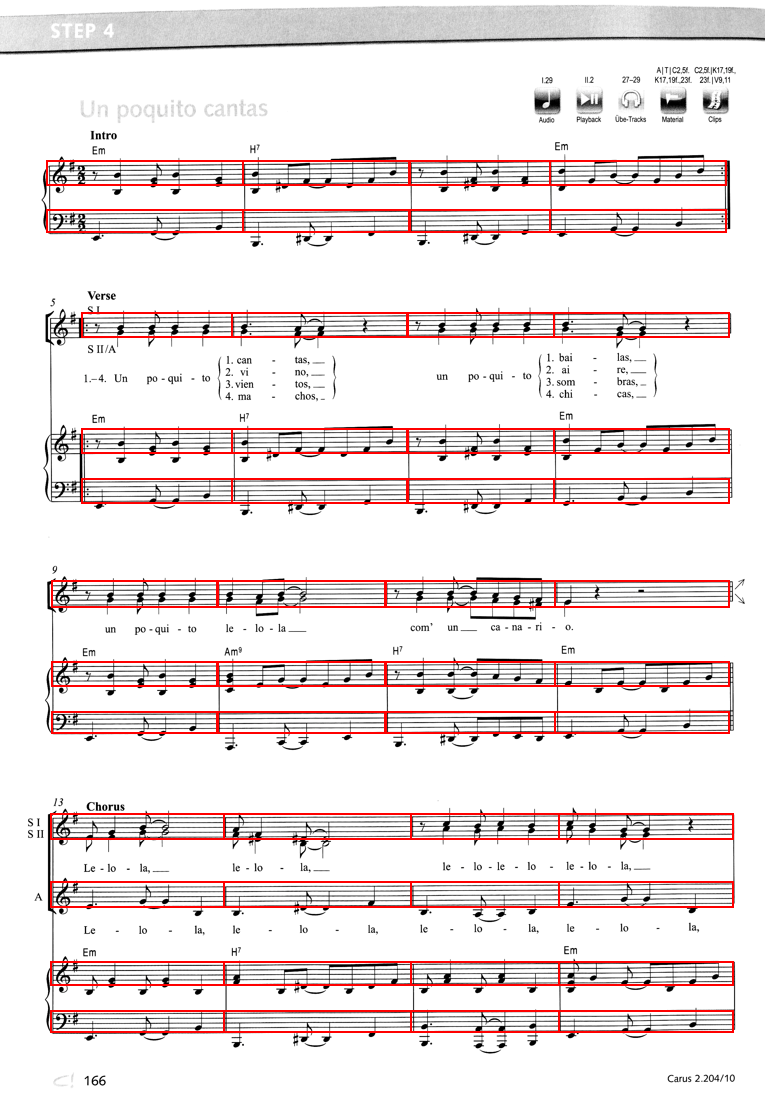

/content/drive/My Drive/Colab Notebooks/Colab Data/AudioLabs/Chorissimo_Blue081/img/Chorissimo_Blue081_001.png


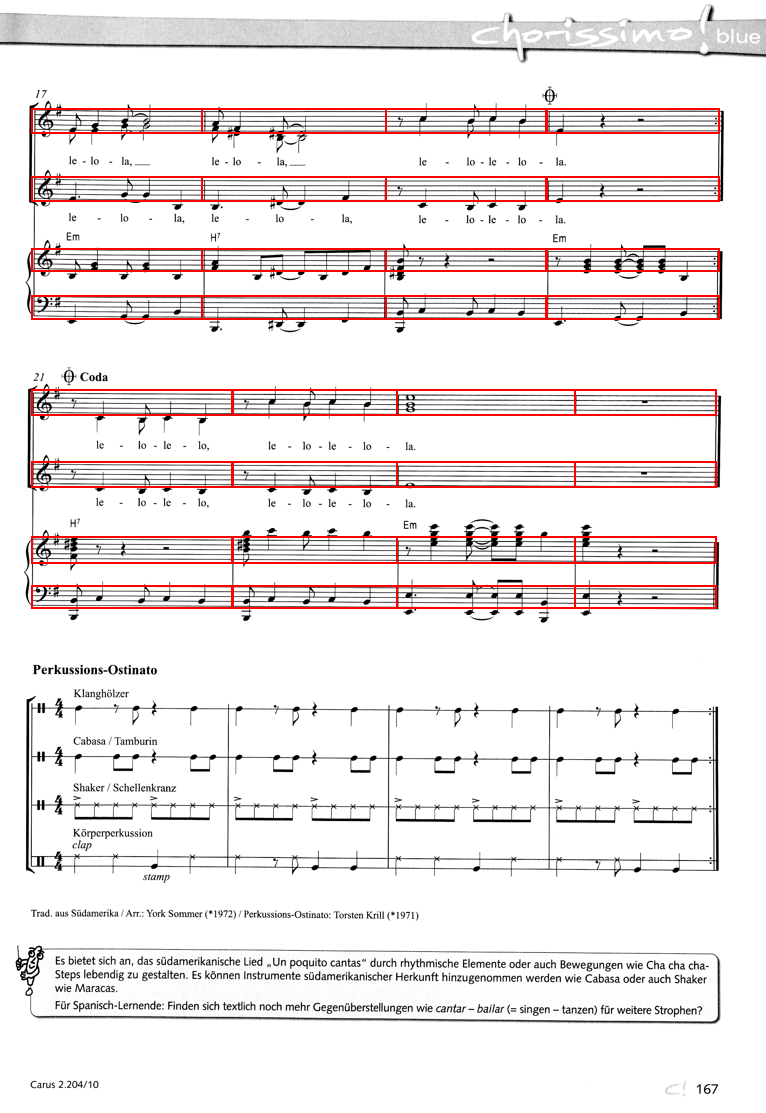

In [ ]:
draw_bounding_boxes("Chorissimo_Blue081", directory_dataset=source_dir, postfix="_measures")

# Copy all the csv's into seperate folder

In [ ]:
import shutil

source_dir = os.path.join(root_dir, "AudioLabs")
annotation_files_path = os.path.join(source_dir, "All_Annotation_Files_Renamed")

for folder in os.listdir(source_dir):
    if folder != "jupyter" and folder != "All_Annotation_Files" and os.path.isdir(os.path.join(source_dir, folder)):
        for files in os.listdir(os.path.join(source_dir, folder)):
            if files.endswith(".csv"):
                try:
                    os.makedirs(os.path.join(annotation_files_path, folder), exist_ok=True)
                    shutil.copy2(os.path.join(source_dir, folder, files), os.path.join(annotation_files_path, folder))
                except shutil.SameFileError:
                    print("File : " + files + " already exists")
                    pass

Rename the original dataset columns to fit the newly created onces

In [ ]:
all_anno_dir = os.path.join(root_dir, "AudioLabs", "All_Annotation_Files_Renamed")

for folder in os.listdir(all_anno_dir):
    for files in os.listdir(os.path.join(all_anno_dir, folder)):
        split_files_name = files.split("_");
        csv_path = os.path.join(all_anno_dir, folder, files)
        df = pd.read_csv(csv_path)

        if len(split_files_name) == 2: # original dataset
            renamed_df = df.rename(columns={"Measure" : "Index", "RowIndex" : "SystemIndex", "X" : "Left", "Y" : "Top"})
            renamed_df.to_csv(csv_path, index=False)
            print(renamed_df)
        # the others have already been properly renamed
        # elif len(split_files_name) == 3 and split_files_name[2] == "staves.csv":
        #     renamed_df = df.rename(columns={"Measure" : "Idx", "RowIndex" : "StaveIdx", "X" : "Left", "Y" : "Top"})
        #     renamed_df.to_csv(csv_path, index=False)
        # elif len(split_files_name) == 4: # _staves_corrected
        #     renamed_df = df.rename(columns={"Measure" : "Idx", "RowIndex" : "StaveIdx", "X" : "Left", "Y" : "Top"})
        #     renamed_df.to_csv(csv_path, index=False)